## Tema de la BD: 
Consumo cultural en los j√≥venes cubanos. Los datos fueron obtenidos mediante la realizaci√≥n de una encuesta.

### Integrantes:
- Ariadna Vel√°zquez Rey  C311
- Lia Stephanie L√≥pez Rosales  C312
- Raidel Miguel Cabellud Lizaso  C311

## Importaci√≥n de las librer√≠as necesarias

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



## 1. Carga de datos

In [59]:
archivo = './Consumo_Cultural_en_Cuba.xlsx'  # Ruta al archivo proporcionado
df = pd.read_excel(archivo)

## 2. Normalizaci√≥n de "G√©neros musicales favoritos"

In [60]:
# Funci√≥n para separar y normalizar los g√©neros musicales
def normalizar_generos(df, columna, separador=','):
    # Crear una lista de listas con los g√©neros separados
    generos_separados = df[columna].dropna().apply(lambda x: [g.strip() for g in x.split(separador)])
    
    # Desplegar la lista y crear un DataFrame
    generos_planos = list(chain(*generos_separados))
    genero_frecuencia = pd.Series(generos_planos).value_counts().reset_index()
    genero_frecuencia.columns = ['Genero', 'Frecuencia']
    
    return genero_frecuencia

In [61]:
# Aplicar la normalizaci√≥n
df_generos_normalizados = normalizar_generos(df, 'G√©neros musicales favoritos')
print("Generos musicales normalizados:")
print(df_generos_normalizados['Genero'].value_counts())

Generos musicales normalizados:
Genero
Pop                  1
Alternative.         1
Folk                 1
kpop                 1
pop                  1
Country              1
Cl√°sica              1
Indie                1
Jrock                1
Dark wave            1
post punk            1
Lo-Fi                1
new wave             1
Rock                 1
Repartero            1
metal                1
lo-fi                1
darkwave             1
synth-pop            1
post-punk            1
Regional mexicano    1
trova                1
rap                  1
Balada               1
Reparto              1
rock                 1
Jpop                 1
Bachata              1
Reggaet√≥n            1
Hip-Hop              1
Jazz                 1
Blues                1
Trap                 1
Experimental         1
Trova                1
Funk                 1
EDM                  1
Rumba                1
Kpop                 1
R&B                  1
                     1
Alternative     

## 3. Normalizaci√≥n de categor√≠as similares en columnas

In [62]:

# Limpieza y normalizaci√≥n de la columna
df['Facultad en que estudias'] = df['Facultad en que estudias'].str.strip().str.lower()

# Funci√≥n de agrupamiento corregida
def categorizar_facultad(facultad):
    ciencias_exactas = ['matcom', 'instec', 'f√≠sica', 'mec√°nica']
    ciencias_naturales = ['biolog√≠a', 'geograf√≠a', 'cultura f√≠sica', 'qu√≠mica', 'ingenier√≠a qu√≠mica']
    humanidades = ['fhs', 'flex', 'fcom', 'psicolog√≠a', 'artes y letras', 'derecho']
    gestion = ['contabilidad y finanzas', 'econom√≠a', 'ftur', 'ingenier√≠a civil', 'industrial']
    creatividad = ['isdi', 'artes visuales', 'famca', 'arquitectura']
    
    if facultad in ciencias_exactas:
        return 'Ciencias Exactas'
    elif facultad in ciencias_naturales:
        return 'Ciencias Naturales'
    elif facultad in humanidades:
        return 'Humanidades'
    elif facultad in gestion:
        return 'Gesti√≥n'
    elif facultad in creatividad:
        return 'Creatividad'
    else:
        return 'Otros'

# Aplicar la funci√≥n al DataFrame
df['Categor√≠a Facultad'] = df['Facultad en que estudias'].apply(categorizar_facultad)

# Verificar los resultados
print(df[['Facultad en que estudias', 'Categor√≠a Facultad']].value_counts())

# Listar valores √∫nicos para detectar errores
print(df['Facultad en que estudias'].unique())


Facultad en que estudias                      Categor√≠a Facultad
matcom                                        Ciencias Exactas      30
fcom                                          Humanidades           25
fhs                                           Humanidades           15
biolog√≠a                                      Ciencias Naturales    10
ingenier√≠a qu√≠mica                            Ciencias Naturales     8
derecho                                       Humanidades            7
psicolog√≠a                                    Humanidades            6
contabilidad y finanzas                       Gesti√≥n                6
industrial                                    Gesti√≥n                6
flex                                          Humanidades            5
qu√≠mica                                       Ciencias Naturales     5
instec                                        Ciencias Exactas       5
enrique cabrera                               Otros                  4
cien

Categor√≠a Facultad
Humanidades           61
Ciencias Exactas      40
Ciencias Naturales    26
Otros                 24
Gesti√≥n               16
Creatividad            5
Name: count, dtype: int64


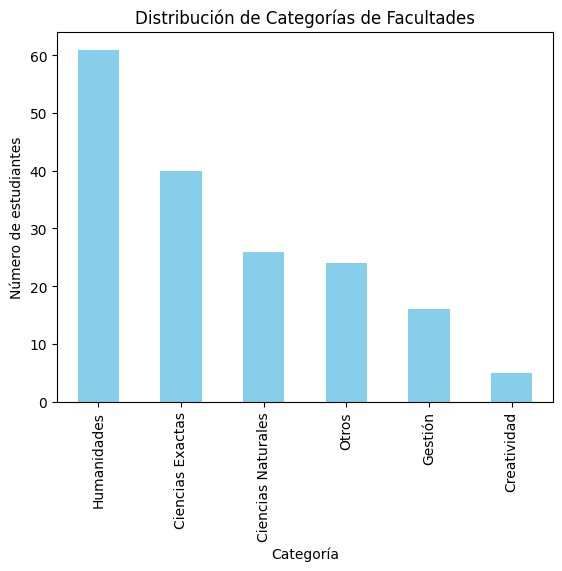

In [63]:
# Conteo por categor√≠a
conteo_categorias = df['Categor√≠a Facultad'].value_counts()
print(conteo_categorias)

# Visualizaci√≥n
conteo_categorias.plot(kind='bar', title='Distribuci√≥n de Categor√≠as de Facultades', color='skyblue')
plt.xlabel('Categor√≠a')
plt.ylabel('N√∫mero de estudiantes')
plt.show()


               G√©nero  Frecuencia  Proporci√≥n
7                 pop         105    0.195531
0                rock          81    0.150838
10          reggaet√≥n          52    0.096834
1             hip-hop          49    0.091248
16               jazz          32    0.059590
5               blues          31    0.057728
2                trap          28    0.052142
4        experimental          26    0.048417
17              trova          26    0.048417
11               funk          16    0.029795
3                 edm          12    0.022346
28              rumba          10    0.018622
15               kpop           8    0.014898
6         alternative           8    0.014898
24              indie           5    0.009311
14                r&b           4    0.007449
12                rap           4    0.007449
30                              4    0.007449
27           corridos           3    0.005587
26              metal           3    0.005587
29              salsa          

/tmp/ipykernel_4210/1738556093.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_generos, x='Proporci√≥n', y='G√©nero', palette='viridis')


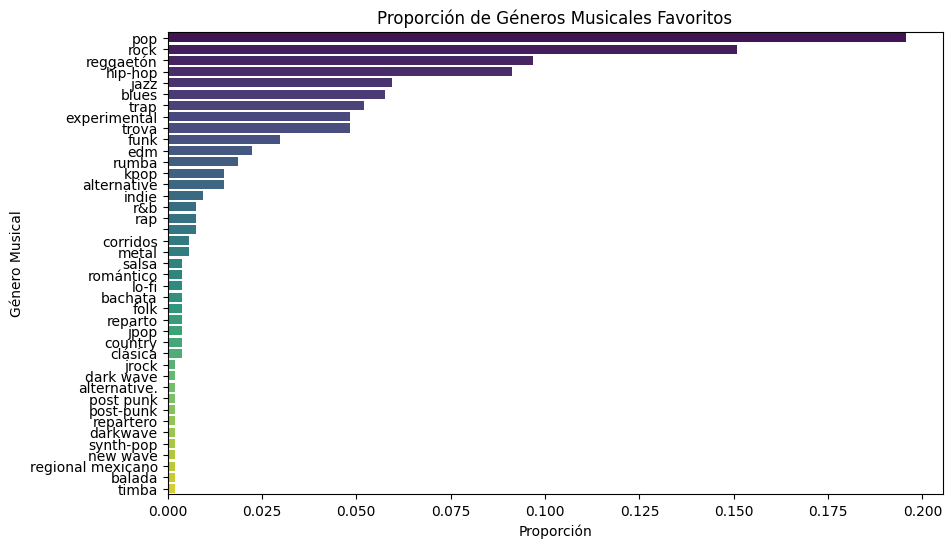

In [64]:
# Normalizaci√≥n de la columna "G√©neros musicales favoritos"
df['G√©neros musicales favoritos'] = df['G√©neros musicales favoritos'].str.lower().str.strip()

# Separar g√©neros por comas y contar frecuencias
from collections import Counter

# Crear una lista con todos los g√©neros
generos = df['G√©neros musicales favoritos'].dropna().str.split(',').explode().str.strip()

# Contar frecuencias
conteo_generos = Counter(generos)

# Crear un DataFrame con los resultados
df_generos = pd.DataFrame(conteo_generos.items(), columns=['G√©nero', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Calcular proporciones
df_generos['Proporci√≥n'] = df_generos['Frecuencia'] / df_generos['Frecuencia'].sum()

# Mostrar los g√©neros m√°s frecuentes
print(df_generos)

# Visualizaci√≥n de las proporciones
plt.figure(figsize=(10, 6))
sns.barplot(data=df_generos, x='Proporci√≥n', y='G√©nero', palette='viridis')
plt.title('Proporci√≥n de G√©neros Musicales Favoritos')
plt.xlabel('Proporci√≥n')
plt.ylabel('G√©nero Musical')
plt.show()


## 4. Exploraci√≥n de datos

- ### Inspecci√≥n inicial

Informaci√≥n general del dataset:

                      Marca temporal  Qu√© edad tienes?
count                            172        172.000000
mean   2024-07-08 04:46:52.402575872         20.104651
min       2024-07-07 09:37:08.497000         17.000000
25%    2024-07-07 11:09:35.190500096         19.000000
50%    2024-07-07 13:52:34.668499968         20.000000
75%    2024-07-08 06:32:28.616750080         21.000000
max       2024-07-24 11:45:22.526000         26.000000
std                              NaN          1.506548


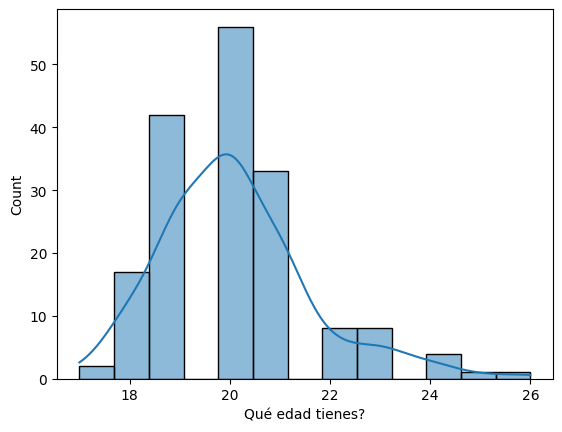

In [65]:
print(df.describe())
sns.histplot(df['Qu√© edad tienes?'], kde=True)
plt.show()

Primeras filas del dataset:

In [66]:
print(df.head())

           Marca temporal Universidad en que estudias  \
0 2024-07-07 09:37:08.497                          UH   
1 2024-07-07 09:43:45.764                          UH   
2 2024-07-07 09:56:11.729                          UH   
3 2024-07-07 10:02:35.432                          UH   
4 2024-07-07 10:08:25.765                         ISA   

  Facultad en que estudias  Qu√© edad tienes?  \
0                   matcom                22   
1                   matcom                20   
2                      fhs                20   
3                 biolog√≠a                20   
4                    famca                18   

  Vertiente cultural que m√°s consumes             G√©neros musicales favoritos  \
0                              M√∫sica                           rock, hip-hop   
1                              M√∫sica  rock, hip-hop, trap, edm, experimental   
2                              M√∫sica        hip-hop, trap, edm, experimental   
3                              M√∫sic

- ### Verificar valores nulos

In [67]:
print(df.isnull().sum())

Marca temporal                                    0
Universidad en que estudias                       1
Facultad en que estudias                          1
Qu√© edad tienes?                                  0
Vertiente cultural que m√°s consumes               0
G√©neros musicales favoritos                       4
Cantante o grupo favorito                        40
Plataforma donde m√°s consumes m√∫sica              1
G√©neros cinematogr√°ficos favoritos                3
Plataforma donde mas consumes cine               10
Pel√≠cula favorita                                46
G√®neros literarios favoritos                      8
Plataforma donde m√°s consumes literatura         14
Escritor favorito                                67
Arte pl√°stica favorita                           27
Plataforma donde m√°s consumes artes pl√°sticas    23
Artista pl√°stico favorito                        84
Categor√≠a Facultad                                0
dtype: int64


## 5. Medidas de tendencia central (media, mediana, moda)


In [68]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"  Media: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}\n")

Qu√© edad tienes?:
  Media: 20.1046511627907
  Mediana: 20.0
  Moda: 20



## 6. Medidas de dispersi√≥n (varianza, desviaci√≥n est√°ndar, rango)


In [69]:
for col in numeric_cols:
    rango = df[col].max() - df[col].min()
    print(f"{col}:")
    print(f"Varianza: {df[col].var()}")
    print(f"Desviaci√≥n est√°ndar: {df[col].std()}")
    print(f"Rango: {rango}\n")

Qu√© edad tienes?:
Varianza: 2.2696858425132596
Desviaci√≥n est√°ndar: 1.5065476569007896
Rango: 9



In [70]:
# Seleccionar el g√©nero m√°s popular
genero_top = df_generos.iloc[0]  # Primer g√©nero (el m√°s popular)
n_top = genero_top['Frecuencia']
n_total = df_generos['Frecuencia'].sum()
prop_top = genero_top['Proporci√≥n']

# Intervalo de confianza para la proporci√≥n del g√©nero m√°s popular
from statsmodels.stats.proportion import proportion_confint
intervalo_genero_top = proportion_confint(n_top, n_total, alpha=0.05, method='normal')

print(f"Proporci√≥n del g√©nero m√°s popular ({genero_top['G√©nero']}): {prop_top:.2f}")
print(f"Intervalo de confianza: {intervalo_genero_top}")


Proporci√≥n del g√©nero m√°s popular (pop): 0.20
Intervalo de confianza: (0.1619860823941815, 0.22907537011978496)


## 7. Visualizaci√≥n

- Histogramas
- Diagrama de dispersi√≥n

### Gr√°fico de Vertientes Culturales

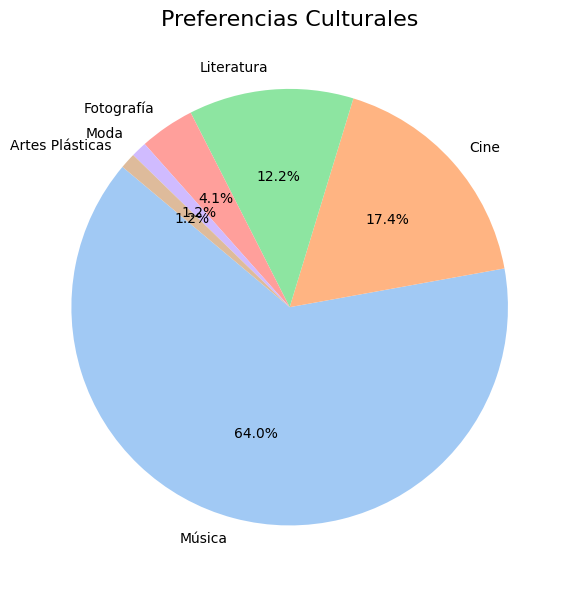

In [71]:
# Visualizaci√≥n para "Vertiente cultural que m√°s consumes"
def plot_cultural_preference(data, cultural_column='Vertiente cultural que m√°s consumes'):
    plt.figure(figsize=(10, 6))
    cultural_counts = data[cultural_column].value_counts()
    colors = sns.color_palette("pastel", len(cultural_counts))
    plt.pie(cultural_counts, labels=cultural_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Preferencias Culturales", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_cultural_preference(df)

### Gr√°fico de Facultades

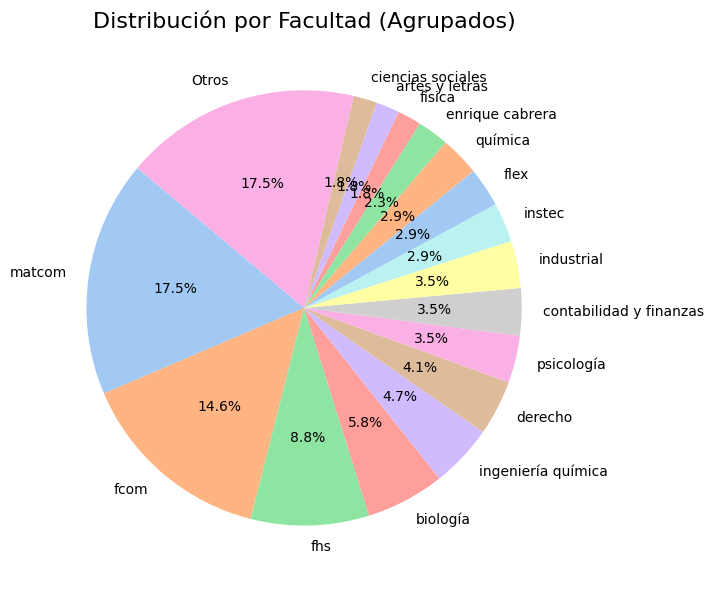

In [72]:
# Funci√≥n para agrupar valores peque√±os en "Otros"
def group_small_categories(series, threshold=0.010):
    total = series.sum()
    series_perc = series / total  # Calcula proporciones
    grouped_series = series.copy()
    grouped_series[series_perc < threshold] = 0  # Valores menores al umbral se agrupan
    grouped_series['Otros'] = series[series_perc < threshold].sum()  # Agrupa en "Otros"
    return grouped_series[grouped_series > 0]  # Filtra los valores mayores a 0

# Visualizaci√≥n circular para "Facultad en que estudias"
def plot_faculty_distribution_pie(data, faculty_column='Facultad en que estudias', threshold=0.015):
    plt.figure(figsize=(10, 6))
    faculty_counts = data[faculty_column].value_counts()
    grouped_faculty_counts = group_small_categories(faculty_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_faculty_counts))
    plt.pie(
        grouped_faculty_counts, 
        labels=grouped_faculty_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribuci√≥n por Facultad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_faculty_distribution_pie(df)

### Gr√°fico de Universidades

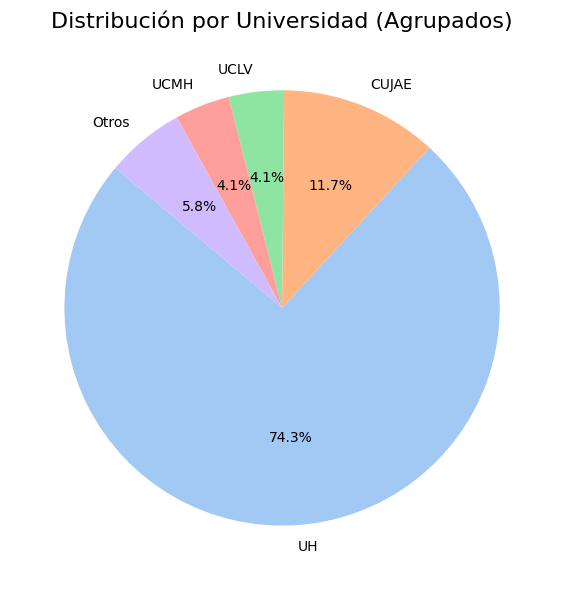

In [73]:
df['Universidad en que estudias'] = df['Universidad en que estudias'].str.strip()
# Gr√°fico circular para "Universidad en que estudias" con agrupaci√≥n
def plot_university_distribution_pie(data, university_column='Universidad en que estudias', threshold=0.025):
    def group_small_categories(series, threshold=0.025):
        total = series.sum()
        series_perc = series / total
        grouped_series = series.copy()
        grouped_series[series_perc < threshold] = 0
        grouped_series['Otros'] = series[series_perc < threshold].sum()
        return grouped_series[grouped_series > 0]

    plt.figure(figsize=(10, 6))
    university_counts = data[university_column].value_counts()
    grouped_university_counts = group_small_categories(university_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_university_counts))
    plt.pie(
        grouped_university_counts, 
        labels=grouped_university_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribuci√≥n por Universidad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_university_distribution_pie(df)

### Relaciones entre Facultad y Manifestaci√≥n Cultural

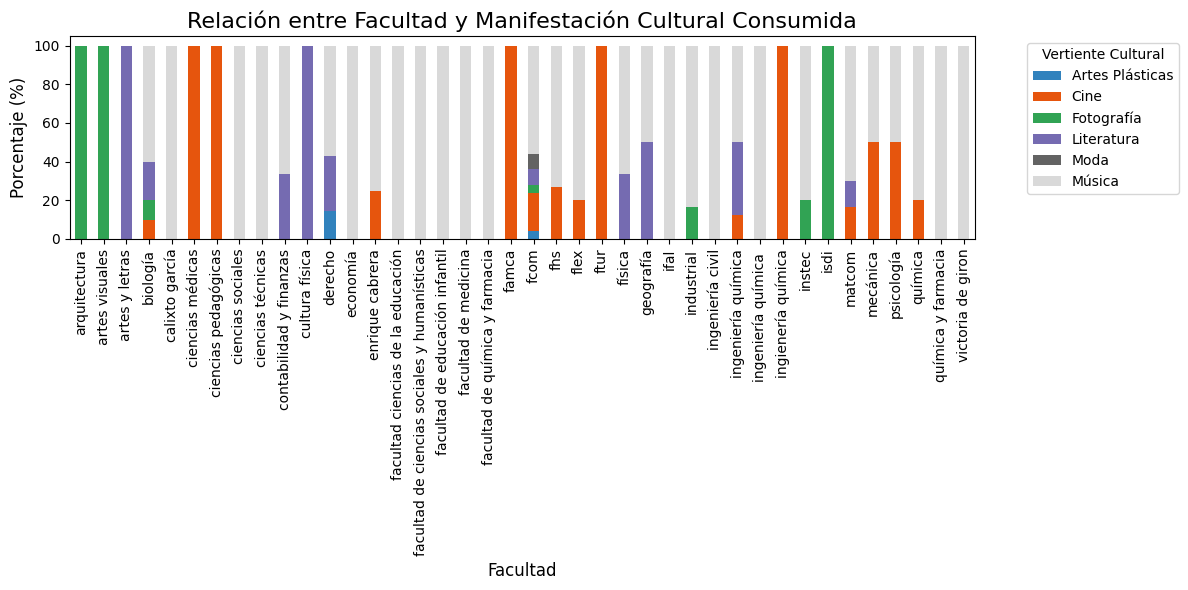

In [74]:
def plot_stacked_bar_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que m√°s consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column], normalize='index') * 100  # Normalizar por fila
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
    plt.title("Relaci√≥n entre Facultad y Manifestaci√≥n Cultural Consumida", fontsize=16)
    plt.xlabel("Facultad", fontsize=12)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.legend(title="Vertiente Cultural", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_heatmap_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que m√°s consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title("Mapa de Calor: Facultad vs Manifestaci√≥n Cultural Consumida", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def plot_mosaic_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que m√°s consumes'):
    # Preparar datos para el mosaico
    mosaic_data = data.groupby([faculty_column, culture_column]).size()
    mosaic_data = mosaic_data / mosaic_data.sum()  # Normalizar
    mosaic_data = mosaic_data.unstack()  # Convertir a tabla
    plt.figure(figsize=(12, 6))
    mosaic(mosaic_data.stack(), title="Mosaico: Facultad vs Vertiente Cultural")
    plt.tight_layout()
    plt.show()
    
# Gr√°fico de barras apiladas
plot_stacked_bar_faculty_culture(df)


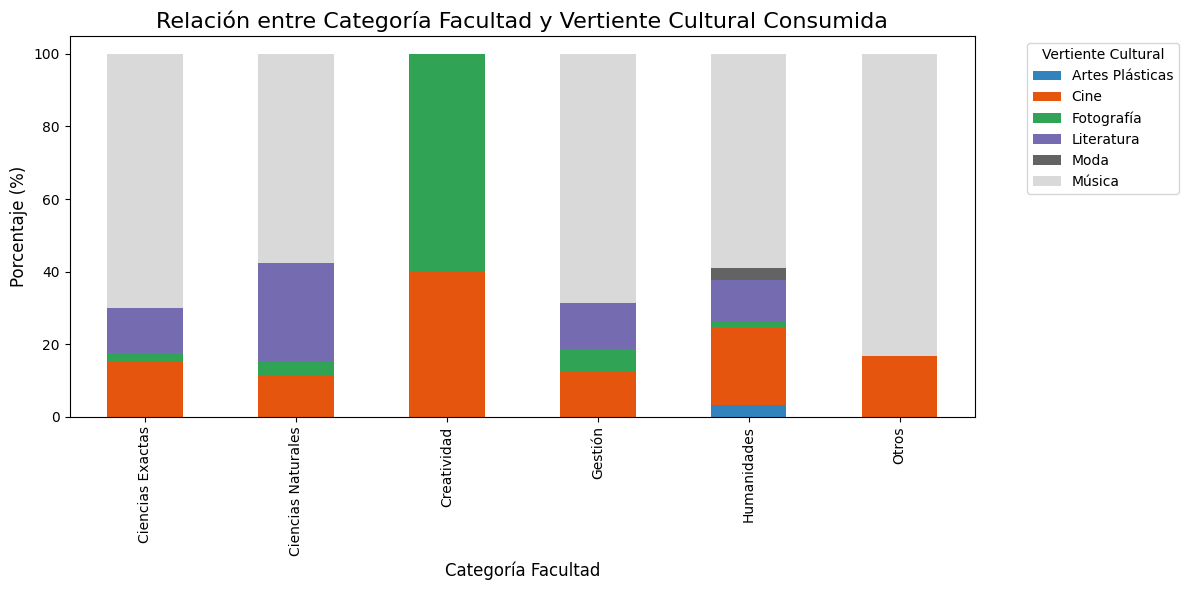

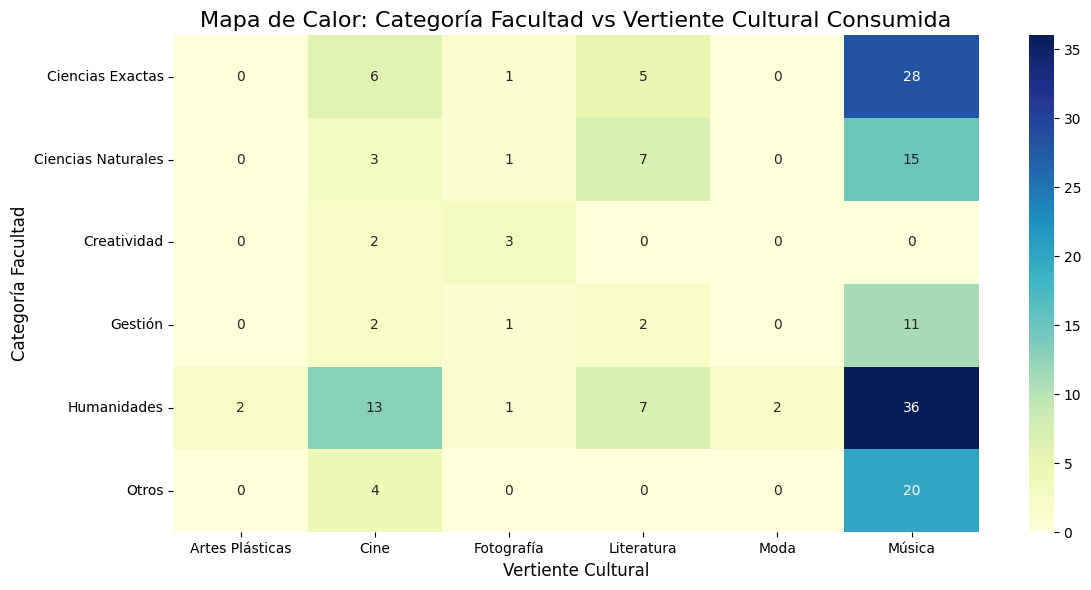

In [75]:
def plot_stacked_bar_facultygroup_culture(data, faculty_column='Categor√≠a Facultad', culture_column='Vertiente cultural que m√°s consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column], normalize='index') * 100  # Normalizar por fila
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
    plt.title("Relaci√≥n entre Categor√≠a Facultad y Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Categor√≠a Facultad", fontsize=12)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.legend(title="Vertiente Cultural", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_heatmap_facultygroup_culture(data, faculty_column='Categor√≠a Facultad', culture_column='Vertiente cultural que m√°s consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title("Mapa de Calor: Categor√≠a Facultad vs Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Categor√≠a Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def plot_mosaic_facultygroup_culture(data, faculty_column='Categor√≠a Facultad', culture_column='Vertiente cultural que m√°s consumes'):
    # Preparar datos para el mosaico
    mosaic_data = data.groupby([faculty_column, culture_column]).size()
    mosaic_data = mosaic_data / mosaic_data.sum()  # Normalizar
    mosaic_data = mosaic_data.unstack()  # Convertir a tabla
    plt.figure(figsize=(12, 6))
    mosaic(mosaic_data.stack(), title="Mosaico: Categor√≠a Facultad vs Vertiente Cultural")
    plt.tight_layout()
    plt.show()
    
# Gr√°fico de barras apiladas
plot_stacked_bar_facultygroup_culture(df)
plot_heatmap_facultygroup_culture(df)

### Graficado con pruebas de Chi-cuadrado
- Relaci√≥n entre Facultad y Manifestaci√≥n Cultural Preferida.
- Relaci√≥n entre Categor√≠a de Facultad y Manifestaci√≥n Cultural Preferida.

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 208.2470
Grados de libertad: 195
Valor p: 0.2452
No se encontr√≥ una relaci√≥n significativa entre la facultad y la vertiente cultural.


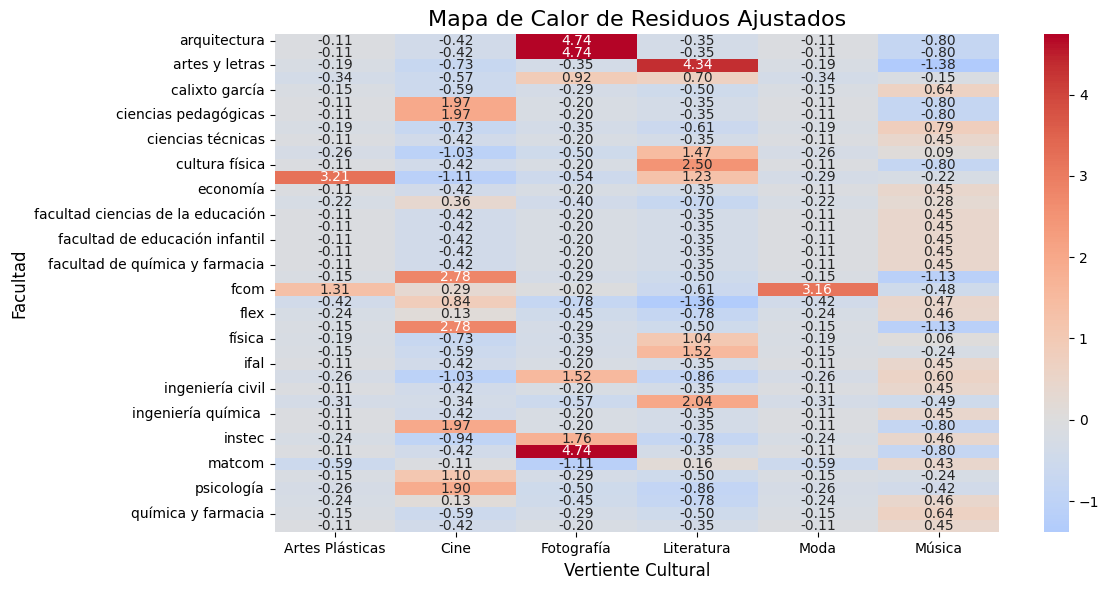

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 64.3431
Grados de libertad: 25
Valor p: 0.0000
Existe una relaci√≥n significativa entre la facultad y la vertiente cultural.


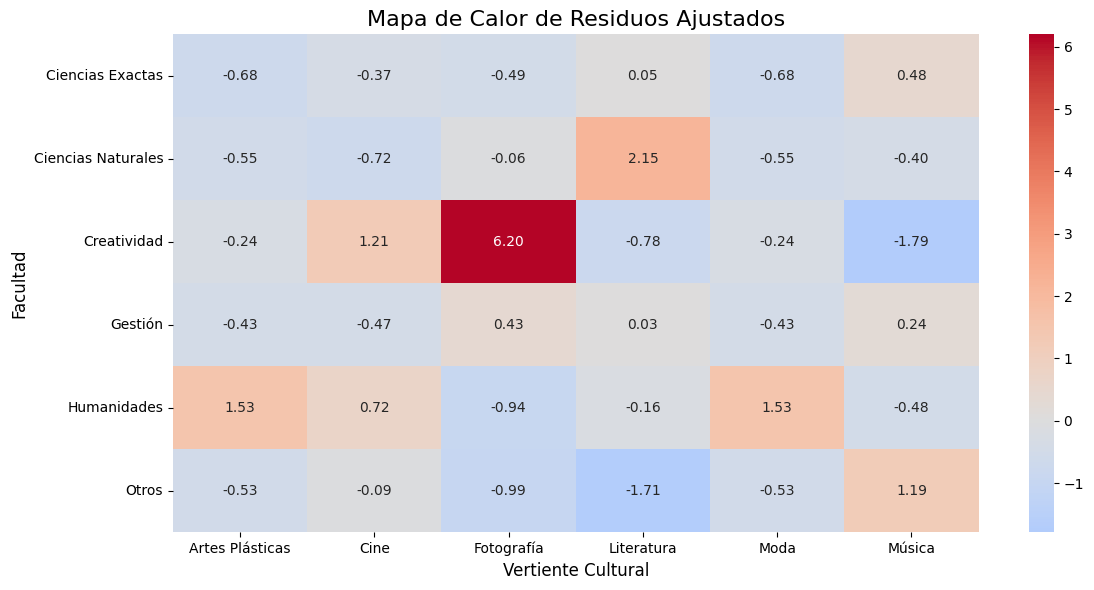

In [76]:
def chi_square_test(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que m√°s consumes'):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[faculty_column], data[culture_column])
    
    # Prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("Resultados de la Prueba de Chi-Cuadrado:")
    print(f"Chi-cuadrado: {chi2:.4f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4f}")
    
    # Verificar significancia
    if p < 0.05:
        print("Existe una relaci√≥n significativa entre la facultad y la vertiente cultural.")
    else:
        print("No se encontr√≥ una relaci√≥n significativa entre la facultad y la vertiente cultural.")
    
    return contingency_table, expected

def plot_residuals_heatmap(contingency_table, expected):
    residuals = (contingency_table - expected) / np.sqrt(expected)  # Residuos ajustados
    plt.figure(figsize=(12, 6))
    sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
    plt.title("Mapa de Calor de Residuos Ajustados", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def post_hoc_analysis(contingency_table, expected, alpha=0.05):
    residuals = (contingency_table - expected) / np.sqrt(expected)
    p_values = 2 * (1 - norm.cdf(np.abs(residuals)))  # Valor p para cada celda
    significant = p_values < alpha  # Identificar celdas significativas
    
    # Mostrar combinaciones significativas
    significant_pairs = np.where(significant)
    # print("\nCombinaciones significativas:")
    # for i, j in zip(significant_pairs[0], significant_pairs[1]):
    #     print(f"Facultad: {contingency_table.index[i]}, Vertiente Cultural: {contingency_table.columns[j]} -> Residuo ajustado: {residuals.iloc[i, j]:.2f}, p-value: {p_values[i, j]:.4f}")
    
    return residuals, p_values

# Paso 1: Realizar la prueba de chi-cuadrado
contingency_table, expected = chi_square_test(df)

# Paso 2: Visualizar los residuos ajustados
plot_residuals_heatmap(contingency_table, expected)

contingency_table1, expected1 = chi_square_test(df,'Categor√≠a Facultad')

plot_residuals_heatmap(contingency_table1, expected1)

# Paso 3: An√°lisis post hoc para identificar combinaciones significativas
residuals, p_values = post_hoc_analysis(contingency_table, expected)


### An√°lisis de cuales son los artistas favoritos de la Manifestaci√≥n Cultural, agrupado por los que eligieron esa manifestaci√≥n como su favorita.

Columna Artista pl√°stico favorito no encontrada. Saltando Artes Pl√°sticas.

Top 15 para M√∫sica:
BTS                  6
Billie Eilish        5
Metallica            4
Imagine Dragons      4
Ariana Grande        3
Kanye West           3
Molchat Doma         2
Silvio Rodr√≠guez     2
Adele                2
Taylor Swift         2
Twenty One Pilots    2
Ed Sheeran           2
Ricardo Arjona       2
Rosal√≠a              2
The Beatles          2
Name: count, dtype: int64

Top 15 para Cine:
Interestelar                            2
Coraline                                2
El Secreto de sus ojos                  1
Rosemarys Baby                          1
Across the universe                     1
El ni√±o con el pijama de rayas          1
Captain Fantastic                       1
Inglorious Basterds                     1
Girl Interrupted                        1
Inferno                                 1
Avatar                                  1
What if                                 1
La t

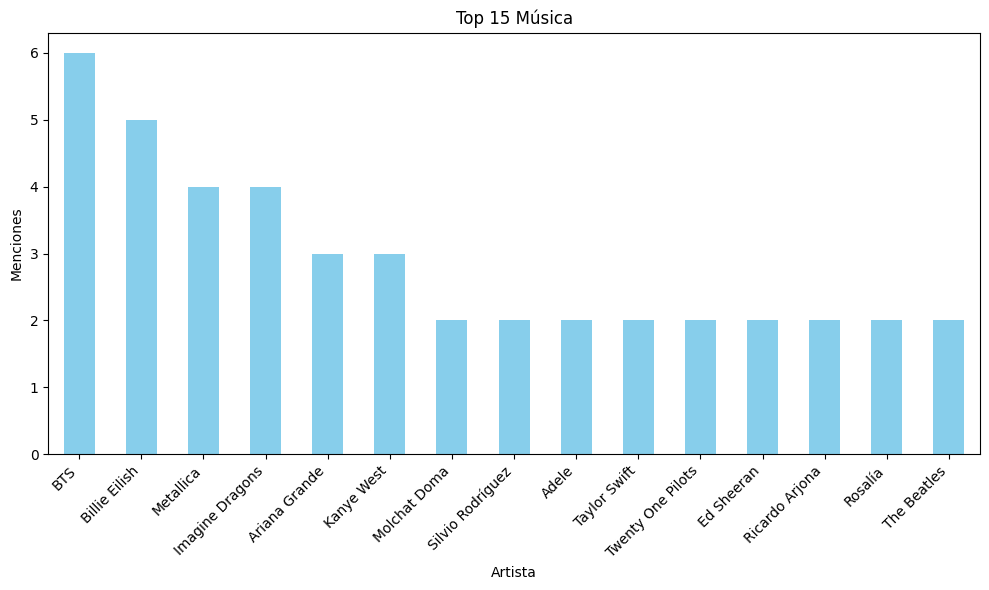

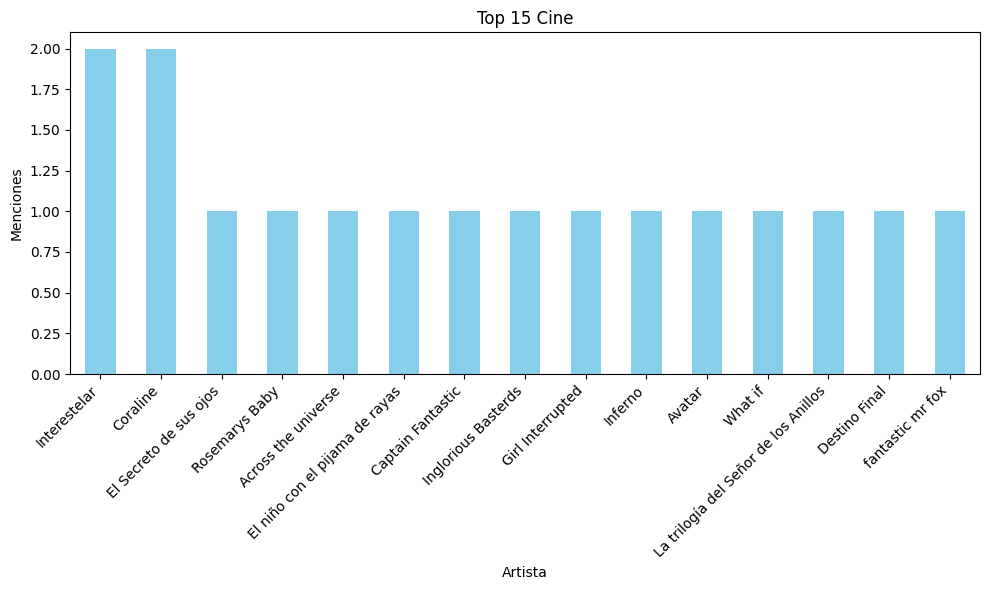

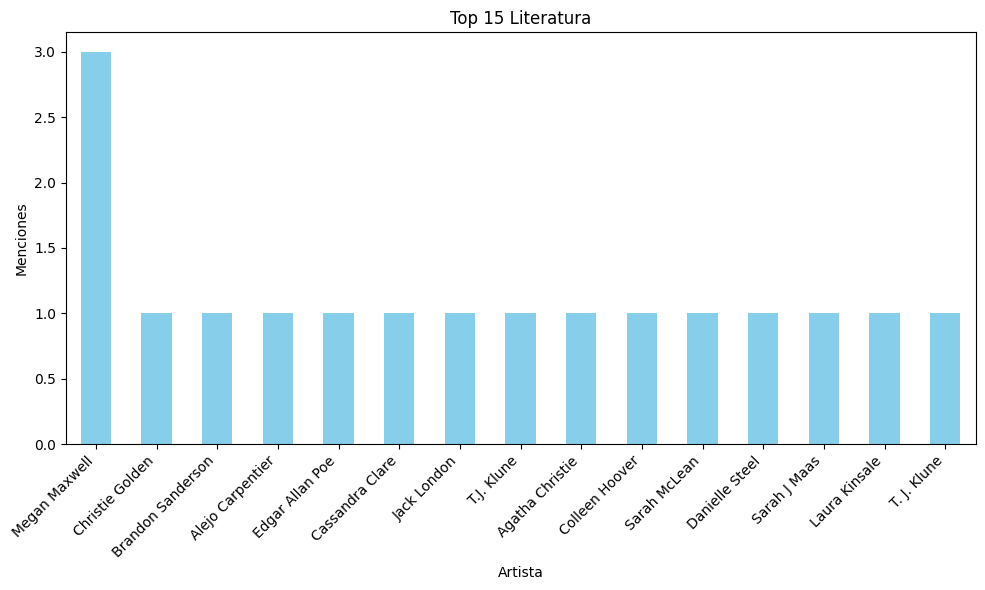

In [77]:


def analyze_favorites(data, culture_column='Vertiente cultural que m√°s consumes', mapping=None):
    """
    Analiza los artistas favoritos por cada vertiente cultural.
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas de datos.
        culture_column (str): Nombre de la columna que contiene la vertiente cultural.
        mapping (dict): Diccionario que asocia vertientes culturales con columnas de artistas favoritos.
    
    Returns:
        dict: Diccionario con los 20 artistas m√°s mencionados por cada vertiente cultural.
    """
    
    if mapping is None:
        mapping = {
            'M√∫sica': 'Cantante o grupo favorito',
            'Cine': 'Pel√≠cula favorita',
            'Literatura': 'Escritor favorito',
            'Artes Pl√°sticas': 'Artista pl√°stico favorito'
        }
    
    # Diccionario para almacenar resultados
    top_artists = {}

    # Iterar por cada vertiente cultural y su columna asociada
    for culture, artist_column in mapping.items():
        if artist_column not in data.columns:
            print(f"Columna {artist_column} no encontrada. Saltando {culture}.")
            continue

        # Filtrar filas de la vertiente cultural actual
        filtered_data = data[data[culture_column] == culture]

        # Crear una lista de todos los artistas mencionados
        artists_list = []
        for response in filtered_data[artist_column].dropna():
            # Dividir respuestas m√∫ltiples usando √∫nicamente el delimitador ","
            artists = response.split(',')
            # Limpiar espacios y agregar a la lista
            artists_list.extend([artist.strip() for artist in artists])

        # Contar la frecuencia de cada artista
        artist_counts = pd.Series(artists_list).value_counts()

        # Seleccionar los 20 artistas m√°s mencionados
        top_artists[culture] = artist_counts.head(15)

    return top_artists


mapping = {
    'M√∫sica': 'Cantante o grupo favorito',
    'Cine': 'Pel√≠cula favorita',
    'Literatura': 'Escritor favorito',
    'Artes Pl√°sticas': 'Artista pl√°stico favorito'
}

# An√°lisis
resultados = analyze_favorites(df, culture_column='Vertiente cultural que m√°s consumes', mapping=mapping)

# Mostrar resultados
for culture, artists in resultados.items():
    print(f"\nTop 15 para {culture}:")
    print(artists)

for culture, artists in resultados.items():
    plt.figure(figsize=(10, 6))
    artists.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 {culture}")
    plt.xlabel("Artista")
    plt.ylabel("Menciones")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



### An√°lisis de cu√°les son los artistas favoritos en general por cada Manifestaci√≥n Cultural.

Columna Artista pl√°stico favorito no encontrada. Saltando...

Top 15 para Cantante o grupo favorito:
BTS                  8
Imagine Dragons      6
Billie Eilish        6
Ariana Grande        5
Melendi              4
Taylor Swift         4
Metallica            4
Morat                3
M√•neskin             3
Ricardo Arjona       3
Kanye West           3
Adele                2
Twenty One Pilots    2
Coldplay             2
Mitski               2
Name: count, dtype: int64

Top 15 para Pel√≠cula favorita:
Interestelar                  6
Forrest Gump                  4
Inception                     3
Piratas del Caribe            3
Fight Club                    3
Harry Potter                  3
Mamma Mia                     3
Avatar                        3
Titanic                       2
Harry potter                  2
Coraline                      2
Tres Metros sobre el cielo    2
The Hunger Games              2
Lucy                          2
Destino Final                 1
Name: count, 

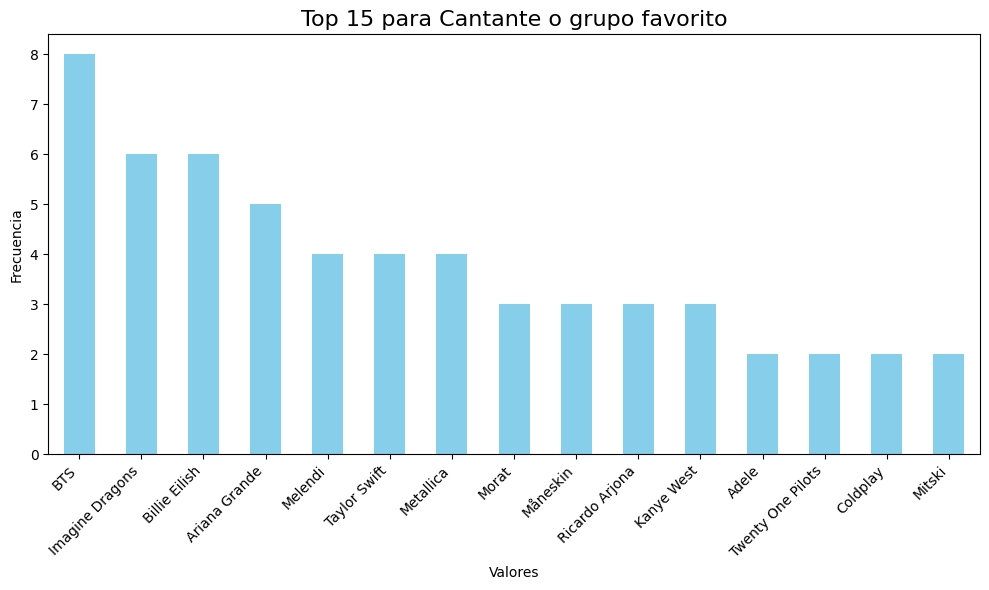

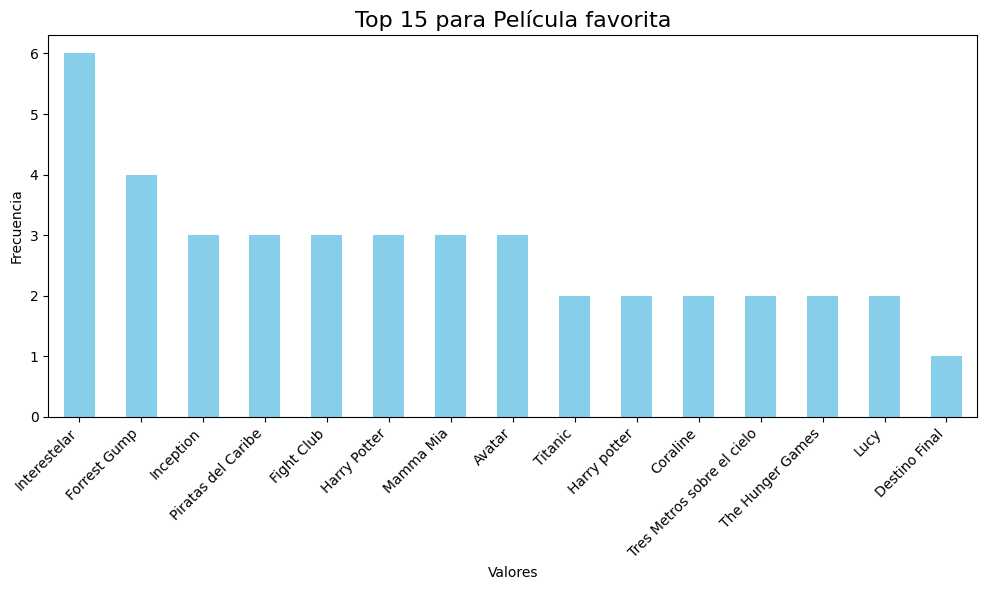

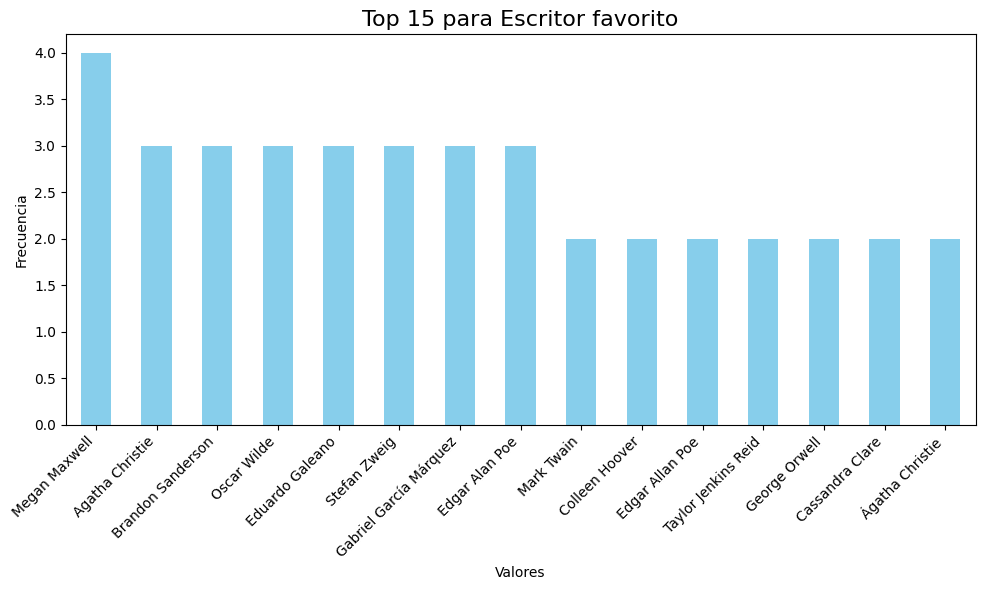

In [78]:
def analyze_top_values(data, columns):
    """
    Analiza los valores m√°s repetidos para cada columna en una lista dada, considerando respuestas m√∫ltiples separadas por ",".
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas a analizar.
        columns (list): Lista de nombres de columnas a analizar.
    
    Returns:
        dict: Diccionario con los 20 valores m√°s repetidos para cada columna.
    """
    # Diccionario para almacenar los resultados
    top_values = {}

    for column in columns:
        if column not in data.columns:
            print(f"Columna {column} no encontrada. Saltando...")
            continue

        # Crear una lista para almacenar los valores
        value_list = []

        for response in data[column].dropna():
            # Dividir respuestas m√∫ltiples usando √∫nicamente el delimitador ","
            values = response.split(',')
            # Limpiar espacios y agregar a la lista
            value_list.extend([value.strip() for value in values])

        # Contar los valores y obtener los 20 m√°s repetidos
        value_counts = pd.Series(value_list).value_counts()
        top_values[column] = value_counts.head(15)

    return top_values



columns_to_analyze = [
    'Cantante o grupo favorito',
    'Pel√≠cula favorita',
    'Escritor favorito',
    'Artista pl√°stico favorito'
]

# An√°lisis
resultados_sin_asociacion = analyze_top_values(df, columns_to_analyze)

# Mostrar resultados
for column, values in resultados_sin_asociacion.items():
    print(f"\nTop 15 para {column}:")
    print(values)
    
for column, values in resultados_sin_asociacion.items():
    plt.figure(figsize=(10, 6))
    values.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 para {column}", fontsize=16)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Graficado porcentual por Manifestaci√≥n Cultural definiendo de los 15 favoritos si son cubanos, hispanohablantes u otros.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

def analizar_por_vertiente_cultural(df, columna_vertiente, columna_objetivo, subcategorias, titulo_grafico):
    """
    An√°lisis de un top 15 por vertiente cultural con gr√°fica de porcentajes.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna_vertiente (str): Nombre de la columna con la vertiente cultural.
        columna_objetivo (str): Nombre de la columna objetivo (cantante, pel√≠cula, escritor).
        subcategorias (dict): Diccionario con las subcategor√≠as.
        titulo_grafico (str): T√≠tulo del gr√°fico.

    Returns:
        pd.DataFrame: DataFrame con los resultados del top 15.
    """
    # Normalizar columnas
    df[columna_vertiente] = df[columna_vertiente].str.strip().str.lower()
    df[columna_objetivo] = df[columna_objetivo].str.strip().str.lower()

    # Calcular el top 15 por vertiente cultural
    top_15 = (
        df.groupby(columna_vertiente)[columna_objetivo]
        .apply(lambda x: x.value_counts().head(15))
        .reset_index(name='Frecuencia')
    )

    # Clasificar en categor√≠as
    def clasificar_respuesta(valor):
        if valor in subcategorias['primera_subcategoria']:
            return 'Hispanohablantes'
        elif valor in subcategorias['segunda_subcategoria']:
            return 'Cubanos'
        else:
            return 'Otros'

    df['Categor√≠a'] = df[columna_objetivo].apply(clasificar_respuesta)

    # Calcular proporciones por vertiente cultural
    proporciones = (
        df.groupby([columna_vertiente, 'Categor√≠a'])
        .size()
        .unstack(fill_value=0)
        .apply(lambda x: x / x.sum() * 100, axis=1)  # Convertir a %
    )

    # Gr√°fico de porcentajes
    proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.8)
    plt.title(f'Porcentaje de Categor√≠as por {titulo_grafico}')
    plt.ylabel('Porcentaje')
    plt.xlabel('Vertiente Cultural')
    plt.legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return top_15


In [80]:
subcategorias_cantante = {
    'primera_subcategoria': [
        'mago de oz', 'ricardo arjona', 'elevaci√≥n', 'rocio jurado', 'alex ubago',
        'melendi', 'natos y waor', 'rosal√≠a', 'morat', 'romeo santos', 'c.tangana',
        'fito y fitipaldis'
    ],
    'segunda_subcategoria': [
        'buena f√©', 'silvio rodr√≠guez', 'pablo milan√©s', 'alexander abreu'
    ]
}

subcategorias_pelicula = {
    'primera_subcategoria': [
        'perdiendo el norte', '3 metros sobre el cielo', 'el secreto de sus ojos'
    ],
    'segunda_subcategoria': [
        'la muerte de un bur√≥crata', 'habana blues'
    ]
}

subcategorias_escritor = {
    'primera_subcategoria': [
        'eduardo galeano', 'gabriel garc√≠a m√°rquez', 'carlos ruiz zaf√≥n', 'risto mejide',
        'eva mu√±oz', 'julio cort√°zar', 'paulo cohelo', 'irene sol√°', 'pablo neruda',
        'julio c√©sar', 'isabel allende', 'agustina bazterrica'
    ],
    'segunda_subcategoria': [
        'julio travieso serrano', 'leonardo padura', 'alejo carpentier'
    ]
}


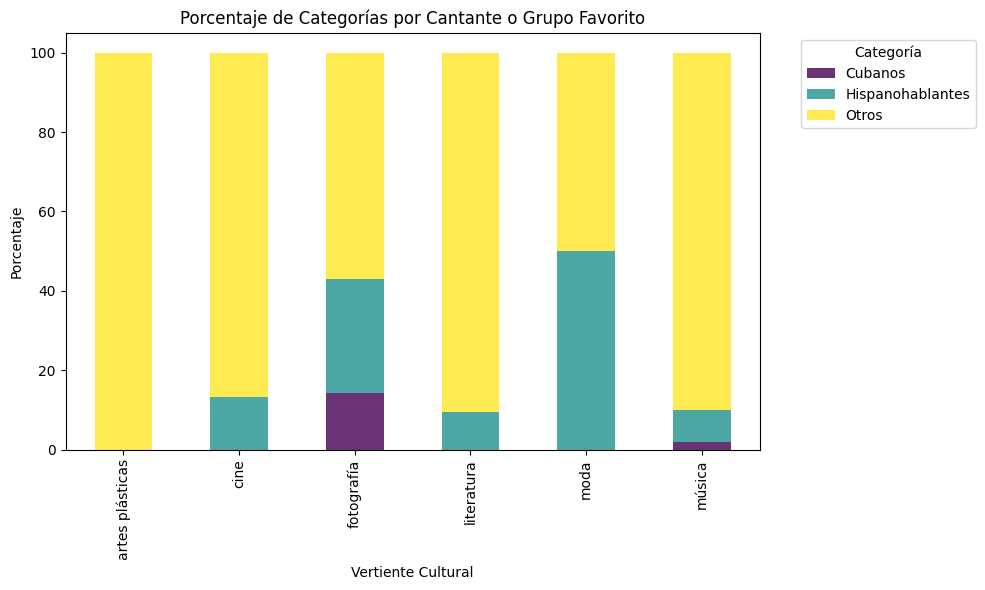

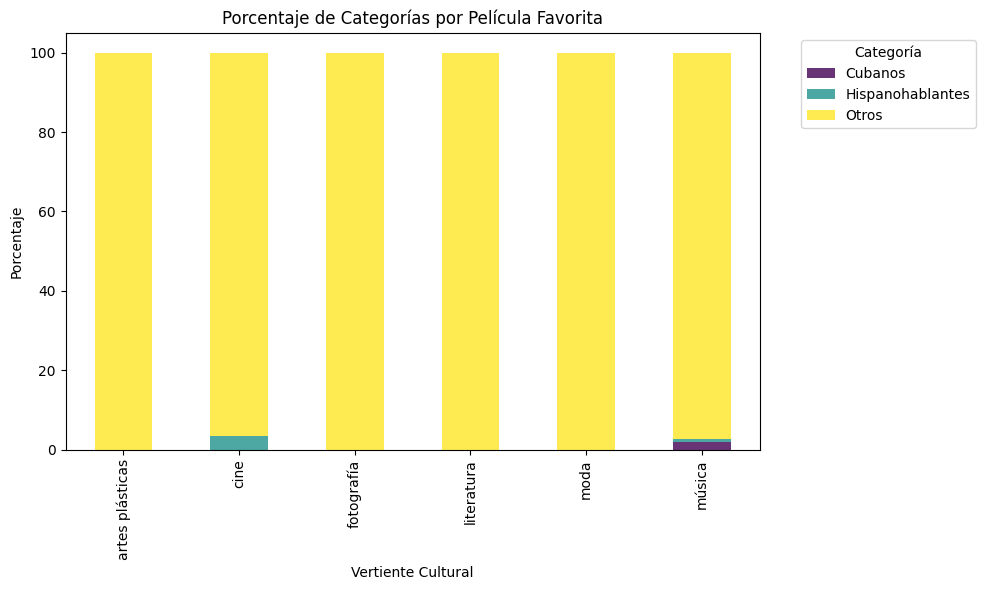

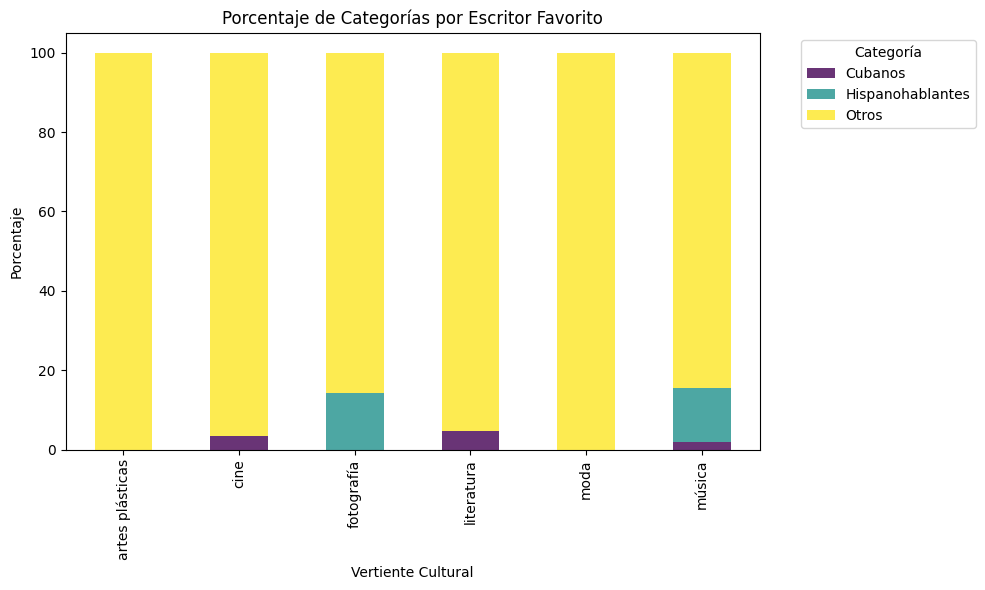

In [81]:
top_cantantes = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que m√°s consumes',
    columna_objetivo='Cantante o grupo favorito',
    subcategorias=subcategorias_cantante,
    titulo_grafico='Cantante o Grupo Favorito'
)

top_peliculas = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que m√°s consumes',
    columna_objetivo='Pel√≠cula favorita',
    subcategorias=subcategorias_pelicula,
    titulo_grafico='Pel√≠cula Favorita'
)

top_escritores = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que m√°s consumes',
    columna_objetivo='Escritor favorito',
    subcategorias=subcategorias_escritor,
    titulo_grafico='Escritor Favorito'
)


## 8. Estimadores

- ### Estimaci√≥n Puntual (M√°xima Verosimilitud)

In [82]:
for col in numeric_cols:
    media_mle = df[col].mean()
    desv_std_mle = df[col].std()
    print(f"Columna: {col}")
    print(f"Media (MLE): {media_mle}")
    print(f"Desviaci√≥n est√°ndar (MLE): {desv_std_mle}")

Columna: Qu√© edad tienes?
Media (MLE): 20.1046511627907
Desviaci√≥n est√°ndar (MLE): 1.5065476569007896


- ### Intervalos de Confianza

In [83]:
from scipy.stats import norm

alpha = 0.05  # Nivel de confianza
for col in numeric_cols:
    media = df[col].mean()
    std_err = df[col].std() / (len(df[col]) ** 0.5)  # Error est√°ndar
    ci = norm.interval(1 - alpha, loc=media, scale=std_err)
    print(f"Columna: {col}")
    print(f"Intervalo de confianza al 95%: {ci}")
    
# Crear una columna binaria: menciona 'Rock' o no
rock_present = df['G√©neros musicales favoritos'].dropna().apply(lambda x: 1 if 'Rock' in x else 0)

# Calcular proporci√≥n y su intervalo de confianza
p_hat = rock_present.mean()  # proporci√≥n
n = len(rock_present)
se = np.sqrt((p_hat * (1 - p_hat)) / n)  # error est√°ndar
z = 1.96  # z para 95% de confianza

ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print("\nIntervalo de Confianza para proporci√≥n de 'Rock':")
print(f"Proporci√≥n: {p_hat:.4f}, Intervalo: [{ci_lower:.4f}, {ci_upper:.4f}]")

Columna: Qu√© edad tienes?
Intervalo de confianza al 95%: (19.87950386346218, 20.329798462119218)

Intervalo de Confianza para proporci√≥n de 'Rock':
Proporci√≥n: 0.0000, Intervalo: [0.0000, 0.0000]


## 9. Pruebas de hip√≥tesis

- ### Hip√≥tesis 1: Comprobar si la media de una variable difiere significativamente de un valor hipot√©tico

In [84]:
# Definir hip√≥tesis
media_hipotesis = 21
media_muestral = df['Qu√© edad tienes?'].mean()
desviacion_muestral = df['Qu√© edad tienes?'].std()
n = len(df['Qu√© edad tienes?'])

# Estad√≠stico de prueba
t_stat = (media_muestral - media_hipotesis) / (desviacion_muestral / np.sqrt(n))
p_value = stats.t.sf(np.abs(t_stat), df=n-1) * 2  # Prueba bilateral

# Resultado
print(f"Estad√≠stico t: {t_stat:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretaci√≥n
if p_value <= 0.05:
    print("Rechazamos la hip√≥tesis nula: La media de la edad es significativamente diferente de 21 a√±os.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que la media es diferente de 21 a√±os.")


Estad√≠stico t: -7.794
p-valor: 0.000
Rechazamos la hip√≥tesis nula: La media de la edad es significativamente diferente de 21 a√±os.


- ### Hip√≥tesis 2: Comparar las medias de dos grupos

In [85]:
# Dividir los datos en dos grupos
grupo1 = df[df['Categor√≠a Facultad'] == 'Ciencias Exactas']['Qu√© edad tienes?']
grupo2 = df[df['Categor√≠a Facultad'] == 'Humanidades']['Qu√© edad tienes?']

# Prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(grupo1, grupo2, equal_var=False)

# Resultados
print(f"Estad√≠stico t: {t_stat:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretaci√≥n
if p_value <= 0.05:
    print("Rechazamos la hip√≥tesis nula: Las edades medias entre los dos grupos son significativamente diferentes.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que las edades medias son diferentes.")


Estad√≠stico t: -1.566
p-valor: 0.120
No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que las edades medias son diferentes.


- ### Hip√≥tesis 3: Comprobar si la distribuci√≥n de una variable es normal

In [86]:
columna = numeric_cols[0]
stat, p_value = stats.shapiro(df[columna].dropna())
print(f"\nHip√≥tesis 3: ¬øLa variable \"{columna}\" sigue una distribuci√≥n normal?")
print(f"Estad√≠stico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hip√≥tesis nula (no es normal).")
else:
    print("No podemos rechazar la hip√≥tesis nula (es normal).")


Hip√≥tesis 3: ¬øLa variable "Qu√© edad tienes?" sigue una distribuci√≥n normal?
Estad√≠stico de prueba: 0.9107014401536149
p-valor: 9.909095839965357e-09
Rechazamos la hip√≥tesis nula (no es normal).


- ### Hip√≥tesis 4: Proporci√≥n de Spotify > 50%

In [87]:
spotify_present = df['Plataforma donde m√°s consumes m√∫sica'].dropna().apply(lambda x: 1 if 'Spotify' in x else 0)
spotify_proporcion = spotify_present.mean()

# Realizar prueba z
z_score = (spotify_proporcion - 0.5) / np.sqrt((0.5 * 0.5) / len(spotify_present))
p_value = 1 - stats.norm.cdf(z_score)

print("\nPrueba de Hip√≥tesis: Proporci√≥n de Spotify > 50%")
print(f"Z-Score: {z_score:.4f}, P-Valor: {p_value:.4f}")
if p_value < 0.05:
    print("Rechazamos la hip√≥tesis nula. La proporcion de usuarios de Spotify es significativamente mayor al 50%.")
else:
    print("No podemos rechazar la hip√≥tesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.")


Prueba de Hip√≥tesis: Proporci√≥n de Spotify > 50%
Z-Score: -10.1708, P-Valor: 1.0000
No podemos rechazar la hip√≥tesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.


- ### Hip√≥tesis 5: Spotify vs. Telegram

In [88]:
telegram_present = df['Plataforma donde m√°s consumes m√∫sica'].dropna().apply(lambda x: 1 if 'Telegram' in x else 0)

# Proporciones y tama√±os
p1, p2 = spotify_present.mean(), telegram_present.mean()
n1, n2 = len(spotify_present), len(telegram_present)

# Estad√≠stico z para diferencia de proporciones
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
se_combined = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
z_diff = (p1 - p2) / se_combined
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("\nPrueba de Hip√≥tesis: Spotify vs Telegram")
print(f"Z-Score: {z_diff:.4f}, P-Valor: {p_diff:.4f}")
if p_diff < 0.05:
    print("Conclusi√≥n: Recazamos la hip√≥tesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.")
else:
    print("Conclusi√≥n: No se rechaza la hip√≥tesis nula. No hay evidencia suficiente de una evidencia significativa entre las proporciones de usuarios de Sotify y Telegram.")



Prueba de Hip√≥tesis: Spotify vs Telegram
Z-Score: -7.5646, P-Valor: 0.0000
Conclusi√≥n: Recazamos la hip√≥tesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.


## 9.1 Tablas de Contingencia y Tests

### Test de Independencia

In [89]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['G√©neros musicales favoritos'], df['Plataforma donde m√°s consumes m√∫sica'])

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretaci√≥n
if p_value <= 0.05:
    print("Rechazamos la hip√≥tesis nula: Existe una relaci√≥n significativa entre los g√©neros musicales y la plataforma de consumo.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que est√°n relacionados.")


Chi-cuadrado: 871.951
p-valor: 0.825
Grados de libertad: 912
Frecuencias esperadas:
[[0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]
 ...
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]
 [0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]]
No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que est√°n relacionados.


### Test de Homogeneidad

In [90]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Categor√≠a Facultad'], df['G√©neros musicales favoritos'])

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretaci√≥n
if p_value <= 0.05:
    print("Rechazamos la hip√≥tesis nula: Las distribuciones de g√©neros musicales no son iguales entre las categor√≠as de facultades.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que las distribuciones son diferentes.")


Chi-cuadrado: 585.037
p-valor: 0.377
Grados de libertad: 575
Frecuencias esperadas:
[[0.45238095 0.45238095 0.22619048 0.22619048 0.9047619  0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.45238095 0.22619048 3.8452381  0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.45238095 0.22619048 0.22619048 0.67857143 0.22619048 0.45238095
  0.22619048 0.22619048 1.13095238 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.67857143 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  1.80952381 0.22619048 0.22619048 0.45238095 0.22619048 0.45238095
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.226190

### Test de bondad de Ajuste.

In [91]:
# Suma de frecuencias observadas
observed = df['G√©neros musicales favoritos'].value_counts()
total_observed = observed.sum()

# Calcular frecuencias esperadas y normalizarlas
expected = [total_observed / len(observed)] * len(observed)  # Distribuci√≥n uniforme
expected = np.array(expected)  # Asegurar que sea un arreglo NumPy

# Ajustar por si hay peque√±as diferencias de redondeo
expected = expected * (total_observed / expected.sum())

# Validar que las sumas coincidan
print(f"Suma observada: {observed.sum()}")
print(f"Suma esperada: {sum(expected)}")

# Prueba de Chi-cuadrado
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretaci√≥n
if p_value <= 0.05:
    print("Rechazamos la hip√≥tesis nula: La distribuci√≥n observada no es uniforme.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay evidencia suficiente para decir que la distribuci√≥n es diferente de uniforme.")


Suma observada: 168
Suma esperada: 167.99999999999983
Chi-cuadrado: 251.810
p-valor: 0.000
Rechazamos la hip√≥tesis nula: La distribuci√≥n observada no es uniforme.


## 10. Regresei√≥n Lineal

### Creaci√≥n del modelo

In [92]:
# Verificar si hay valores faltantes
print(df[['Qu√© edad tienes?', 'Vertiente cultural que m√°s consumes', 'G√©neros musicales favoritos']].isnull().sum())

# Limpiar datos: eliminar espacios adicionales y convertir a min√∫sculas
df['Vertiente cultural que m√°s consumes'] = df['Vertiente cultural que m√°s consumes'].str.strip().str.lower()
df['G√©neros musicales favoritos'] = df['G√©neros musicales favoritos'].str.strip().str.lower()

# Seleccionar variables relevantes y eliminar filas con valores faltantes
variables_categoricas = ['Vertiente cultural que m√°s consumes', 'G√©neros musicales favoritos']
df_model = df[['Qu√© edad tienes?'] + variables_categoricas].dropna()

# # Revisar y reducir categor√≠as en variables categ√≥ricas
# threshold = 8
# for col in variables_categoricas:
#     frecuencias = df[col].value_counts()
#     categorias_a_mantener = frecuencias[frecuencias >= threshold].index
#     df[col] = df[col].apply(lambda x: x if x in categorias_a_mantener else 'Otros')


# Codificar variables categ√≥ricas con one-hot encoding
df_model = pd.get_dummies(df_model, columns=variables_categoricas, drop_first=True)

# Convertir todas las columnas a float
df_model = df_model.astype(float)

# Definir variables dependiente e independientes
X = df_model.drop('Qu√© edad tienes?', axis=1)
y = df_model['Qu√© edad tienes?']

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresi√≥n lineal
modelo = sm.OLS(y, X).fit()

print("N√∫mero de residuos:", len(modelo.resid))

# Resumen del modelo
print(modelo.summary())




Qu√© edad tienes?                       0
Vertiente cultural que m√°s consumes    0
G√©neros musicales favoritos            4
dtype: int64
N√∫mero de residuos: 168
                            OLS Regression Results                            
Dep. Variable:       Qu√© edad tienes?   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.001
Date:                Mon, 03 Feb 2025   Prob (F-statistic):              0.512
Time:                        19:24:19   Log-Likelihood:                -202.86
No. Observations:                 168   AIC:                             645.7
Df Residuals:                      48   BIC:                             1021.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                             

### Graficaci√≥n.

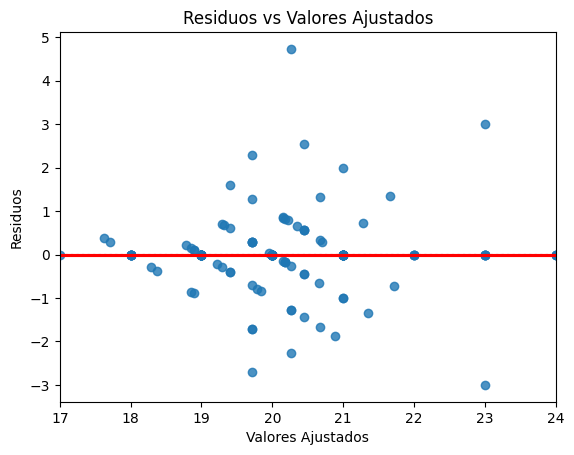

Estad√≠stico de Shapiro-Wilk: 0.714, p-valor: 0.000
Estad√≠stico LM: 67.050, p-valor: 1.000


/home/lia/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/lia/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              Variable       VIF
0                                                const  0.000000
1             Vertiente cultural que m√°s consumes_cine       inf
2       Vertiente cultural que m√°s consumes_fotograf√≠a       inf
3       Vertiente cultural que m√°s consumes_literatura       inf
4             Vertiente cultural que m√°s consumes_moda       inf
..                                                 ...       ...
116  G√©neros musicales favoritos_rock, reggaet√≥n, r...  1.556045
117  G√©neros musicales favoritos_rock, reggaet√≥n, t...  1.583603
118  G√©neros musicales favoritos_rock, reggaet√≥n, t...  1.556045
119                   G√©neros musicales favoritos_trap  2.050073
120                  G√©neros musicales favoritos_trova  2.298282

[121 rows x 2 columns]


In [93]:
# Residuos vs Valores Ajustados
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# # Seleccionar una muestra de los residuos para graficar
# residuos_muestra = modelo.resid.sample(50, random_state=42)

# # Graficar la muestra
# sns.histplot(residuos_muestra, kde=True)
# plt.title('Distribuci√≥n de Residuos (Muestra)')
# plt.xlabel('Residuos')
# plt.ylabel('Frecuencia')
# plt.show()

# Prueba de Shapiro-Wilk
stat, p_value = shapiro(modelo.resid)
print(f"Estad√≠stico de Shapiro-Wilk: {stat:.3f}, p-valor: {p_value:.3f}")

# Prueba de Breusch-Pagan
lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(modelo.resid, X)
print(f"Estad√≠stico LM: {lm_stat:.3f}, p-valor: {lm_p_value:.3f}")

# Calcular VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


## 10.1 Evaluaci√≥n del modelo de regresi√≥n lineal.

In [94]:
# Resumen del modelo
print("=== Resumen del Modelo ===")
print(f"R-cuadrado: {modelo.rsquared:.3f}")
print(f"R-cuadrado ajustado: {modelo.rsquared_adj:.3f}")
print(f"Error est√°ndar residual: {np.sqrt(modelo.mse_resid):.3f}")
print("\n=== Coeficientes Significativos ===")

# Filtrar coeficientes significativos
resultados_coeficientes = modelo.summary2().tables[1]  # Tabla de coeficientes
significativos = resultados_coeficientes[resultados_coeficientes['P>|t|'] <= 0.05]

if not significativos.empty:
    print(significativos[['Coef.', 'P>|t|', '[0.025', '0.975]']])
    print("\nInterpretaci√≥n:")
    for idx, row in significativos.iterrows():
        signo = "aumenta" if row['Coef.'] > 0 else "reduce"
        print(f"- {idx}: {signo} la edad promedio en {abs(row['Coef.']):.2f} a√±os (p = {row['P>|t|']:.3f}).")
else:
    print("No se encontraron coeficientes significativos.")

# Evaluaci√≥n de los supuestos
print("\n=== Evaluaci√≥n de los Supuestos ===")

# Normalidad de residuos
if p_value > 0.05:
    print("Los residuos siguen una distribuci√≥n normal (p > 0.05).")
else:
    print("Los residuos NO siguen una distribuci√≥n normal (p <= 0.05).")

# Homoscedasticidad
if lm_p_value > 0.05:
    print("Los residuos tienen varianza constante (homoscedasticidad, p > 0.05).")
else:
    print("Los residuos NO tienen varianza constante (heteroscedasticidad, p <= 0.05).")

# Multicolinealidad
print("\n=== Multicolinealidad ===")
vif_problematicas = vif_data[vif_data['VIF'] > 5]
if not vif_problematicas.empty:
    print(f"Variables con multicolinealidad problem√°tica (VIF > 5):")
    print(vif_problematicas)
else:
    print("No se detect√≥ multicolinealidad problem√°tica (VIF <= 5).")

# Resumen final
print("\n=== Resumen Final ===")
if modelo.rsquared_adj >= 0.3:
    print("El modelo explica una proporci√≥n significativa de la variabilidad en la edad.")
else:
    print("El modelo tiene un bajo poder explicativo (R^2 ajustado < 0.3).")

if not significativos.empty and p_value > 0.05 and lm_p_value > 0.05:
    print("El modelo es v√°lido y tiene al menos una variable significativa.")
else:
    print("Revisar supuestos y/o considerar m√°s variables.")


=== Resumen del Modelo ===
R-cuadrado: 0.713
R-cuadrado ajustado: 0.001
Error est√°ndar residual: 1.514

=== Coeficientes Significativos ===
                                                        Coef.         P>|t|  \
const                                               15.459899  5.871276e-23   
Vertiente cultural que m√°s consumes_cine             2.912471  3.919385e-05   
Vertiente cultural que m√°s consumes_literatura       2.167730  1.005283e-03   
Vertiente cultural que m√°s consumes_m√∫sica           2.480196  7.308475e-05   
G√©neros musicales favoritos_hip-hop                  3.716137  1.986016e-02   
G√©neros musicales favoritos_hip-hop, pop, trova      4.627630  1.831410e-02   
G√©neros musicales favoritos_jazz, trova, blues,...   5.059904  1.094027e-02   
G√©neros musicales favoritos_pop, folk, indie, a...   5.627630  4.633839e-03   
G√©neros musicales favoritos_pop, jazz, blues         5.540101  7.679811e-04   
G√©neros musicales favoritos_pop, trap, kpop          6.0599

ANOVA

In [95]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Selecci√≥n de variables relevantes
df_anova = df[['Qu√© edad tienes?', 'Vertiente cultural que m√°s consumes', 'Plataforma donde m√°s consumes m√∫sica']].dropna()

# üîπ **ANOVA de Un Factor**: ¬øLa edad var√≠a seg√∫n la Vertiente Cultural?
grupos = [df_anova[df_anova['Vertiente cultural que m√°s consumes'] == cat]['Qu√© edad tienes?']
          for cat in df_anova['Vertiente cultural que m√°s consumes'].unique()]

stat, p_value = stats.f_oneway(*grupos)

print("üîπ **ANOVA de Un Factor (Vertiente Cultural)**")
print(f"Estad√≠stico F: {stat:.3f}, p-valor: {p_value:.3f}")

if p_value <= 0.05:
    print("Rechazamos H0: Existen diferencias significativas en la edad seg√∫n la vertiente cultural.")
else:
    print("No se rechaza H0: No hay evidencia de diferencias significativas en la edad.")

#  **ANOVA de Dos Factores**: ¬øInteracci√≥n entre Vertiente Cultural y Plataforma de Consumo?
modelo = ols('Q("Qu√© edad tienes?") ~ C(Q("Vertiente cultural que m√°s consumes")) + C(Q("Plataforma donde m√°s consumes m√∫sica")) + C(Q("Vertiente cultural que m√°s consumes")):C(Q("Plataforma donde m√°s consumes m√∫sica"))', data=df_anova).fit()

anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nüîπ **ANOVA de Dos Factores**")
print(anova_table)


üîπ **ANOVA de Un Factor (Vertiente Cultural)**
Estad√≠stico F: 2.059, p-valor: 0.073
No se rechaza H0: No hay evidencia de diferencias significativas en la edad.

üîπ **ANOVA de Dos Factores**
                                                          sum_sq     df  \
C(Q("Vertiente cultural que m√°s consumes"))        -1.503634e+00    5.0   
C(Q("Plataforma donde m√°s consumes m√∫sica"))        4.783805e-13    8.0   
C(Q("Vertiente cultural que m√°s consumes")):C(Q...  4.906726e+01   40.0   
Residual                                            3.428041e+02  146.0   

                                                               F    PR(>F)  
C(Q("Vertiente cultural que m√°s consumes"))        -1.280793e-01  1.000000  
C(Q("Plataforma donde m√°s consumes m√∫sica"))        2.546773e-14  1.000000  
C(Q("Vertiente cultural que m√°s consumes")):C(Q...  5.224426e-01  0.957603  
Residual                                                     NaN       NaN  


/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 40, but rank is 21
  warnings.warn('covariance of constraints does not have full '


Como los primeros resultados indican que los valores obtenidos presentan un problema estad√≠stico importante:

    El F de "Vertiente Cultural" es negativo (-0.128), lo cual no tiene sentido en ANOVA.
    El F de "Plataforma de Consumo" es extremadamente peque√±o (2.55e-14), lo que indica falta de variabilidad en los datos.
    El p-valor de todas las variables es 1.000 o muy cercano a 1, lo que indica que no hay ninguna diferencia significativa detectada.
    El modelo est√° mal condicionado, lo que puede deberse a:
        Multicolinealidad extrema entre variables.
        Muestra insuficiente para el n√∫mero de categor√≠as analizadas.
        Categor√≠as con pocos datos en algunas combinaciones.

Por tanto fusionaremos categor√≠as peque√±as para mejorar la inestabilidad y realizaremos la prueba de Prueba de Kruskal-Wallis para evitar interferencias por incumplimiento por varianzas no homogeneas y datos no normales

ANOVA(agrupado)

In [96]:
# Paso 1: Reemplazar valores NaN con "Desconocido" antes de fusionar categor√≠as
df['Vertiente cultural que m√°s consumes'] = df['Vertiente cultural que m√°s consumes'].fillna('Desconocido')
df['Plataforma donde m√°s consumes m√∫sica'] = df['Plataforma donde m√°s consumes m√∫sica'].fillna('Desconocido')

# Paso 2: Fusionar categor√≠as con menos de 5 observaciones en "Otras"
threshold = 5  # M√≠nimo de observaciones para mantener una categor√≠a

# Fusionar "Vertiente cultural que m√°s consumes"
valores_a_mantener = df['Vertiente cultural que m√°s consumes'].value_counts()[df['Vertiente cultural que m√°s consumes'].value_counts() >= threshold].index
df['Vertiente cultural que m√°s consumes'] = df['Vertiente cultural que m√°s consumes'].apply(lambda x: x if x in valores_a_mantener else 'Otras')

# Fusionar "Plataforma donde m√°s consumes m√∫sica"
valores_a_mantener = df['Plataforma donde m√°s consumes m√∫sica'].value_counts()[df['Plataforma donde m√°s consumes m√∫sica'].value_counts() >= threshold].index
df['Plataforma donde m√°s consumes m√∫sica'] = df['Plataforma donde m√°s consumes m√∫sica'].apply(lambda x: x if x in valores_a_mantener else 'Otras')

# Paso 3: Verificar la distribuci√≥n despu√©s de la fusi√≥n
print("Distribuci√≥n de Vertiente Cultural despu√©s de fusionar:")
print(df['Vertiente cultural que m√°s consumes'].value_counts())

print("\nDistribuci√≥n de Plataforma de Consumo despu√©s de fusionar:")
print(df['Plataforma donde m√°s consumes m√∫sica'].value_counts())


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Filtrar valores nulos
df_anova = df[['Qu√© edad tienes?', 'Vertiente cultural que m√°s consumes', 'Plataforma donde m√°s consumes m√∫sica']].dropna()

# üîπ **ANOVA de Un Factor** (Edad seg√∫n Vertiente Cultural)
grupos = [df_anova[df_anova['Vertiente cultural que m√°s consumes'] == cat]['Qu√© edad tienes?']
          for cat in df_anova['Vertiente cultural que m√°s consumes'].unique()]

stat, p_value = stats.f_oneway(*grupos)

print("\nüîπ **ANOVA de Un Factor (Vertiente Cultural)**")
print(f"Estad√≠stico F: {stat:.3f}, p-valor: {p_value:.3f}")

if p_value <= 0.05:
    print(" Rechazamos H0: La vertiente cultural influye significativamente en la edad.")
else:
    print(" No se rechaza H0: No hay evidencia de diferencias en la edad seg√∫n la vertiente cultural.")

# üîπ **ANOVA de Dos Factores** (Vertiente Cultural y Plataforma de Consumo)
modelo = ols('Q("Qu√© edad tienes?") ~ C(Q("Vertiente cultural que m√°s consumes")) + C(Q("Plataforma donde m√°s consumes m√∫sica")) + C(Q("Vertiente cultural que m√°s consumes")):C(Q("Plataforma donde m√°s consumes m√∫sica"))', data=df_anova).fit()

anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nüîπ **ANOVA de Dos Factores**")
print(anova_table)


Distribuci√≥n de Vertiente Cultural despu√©s de fusionar:
Vertiente cultural que m√°s consumes
m√∫sica        110
cine           30
literatura     21
fotograf√≠a      7
Otras           4
Name: count, dtype: int64

Distribuci√≥n de Plataforma de Consumo despu√©s de fusionar:
Plataforma donde m√°s consumes m√∫sica
Telegram         83
Youtube Music    42
Spotify          19
Deezer           15
Otras            13
Name: count, dtype: int64

üîπ **ANOVA de Un Factor (Vertiente Cultural)**
Estad√≠stico F: 2.022, p-valor: 0.094
 No se rechaza H0: No hay evidencia de diferencias en la edad seg√∫n la vertiente cultural.

üîπ **ANOVA de Dos Factores**
                                                        sum_sq     df  \
C(Q("Vertiente cultural que m√°s consumes"))         498.731125    4.0   
C(Q("Plataforma donde m√°s consumes m√∫sica"))          1.007499    4.0   
C(Q("Vertiente cultural que m√°s consumes")):C(Q...   73.995091   16.0   
Residual                                            

/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/home/lia/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  warnings.warn('covariance of constraints does not have full '


Interpretaci√≥n:

    Vertiente Cultural tiene un efecto en la edad (p=1.43√ó10‚àí23p=1.43√ó10‚àí23 ‚â™ 0.05).
    Plataforma donde m√°s consumes m√∫sica no tiene efecto significativo (p=0.955p=0.955).
    Existe una interacci√≥n entre Vertiente Cultural y Plataforma de Consumo (p=0.019p=0.019).

Pero a√∫n as√≠ no hay suficiente claridad en los resultados

Prueba de Kruskal-Wallis

In [97]:
from scipy.stats import kruskal

# Crear grupos de edad por vertiente cultural
grupos = [df_anova[df_anova['Vertiente cultural que m√°s consumes'] == cat]['Qu√© edad tienes?']
          for cat in df_anova['Vertiente cultural que m√°s consumes'].unique()]

# Aplicar la prueba de Kruskal-Wallis
stat, p_value = kruskal(*grupos)

print("\nüîπ **Prueba de Kruskal-Wallis (Vertiente Cultural)**")
print(f"Estad√≠stico H: {stat:.3f}, p-valor: {p_value:.3f}")

if p_value <= 0.05:
    print("Rechazamos H0: Existen diferencias significativas en la edad seg√∫n la vertiente cultural.")
else:
    print("No se rechaza H0: No hay evidencia de diferencias significativas en la edad.")



üîπ **Prueba de Kruskal-Wallis (Vertiente Cultural)**
Estad√≠stico H: 8.393, p-valor: 0.078
No se rechaza H0: No hay evidencia de diferencias significativas en la edad.


Procedemos a analizar relaciones entre variables categ√≥ricas utilizando MCA(AN√ÅLISIS DE CORRESPONDENCIAS M√öLTIPLES)

üîé Eliminando 219 columnas con baja frecuencia.
üîé Dimensiones de df_mca: (172, 9)
üîé Cantidad de valores no nulos por columna:
blues        172
edm          172
funk         172
hip-hop      172
reggaet√≥n    172
rumba        172
Poes√≠a       172
Drama        172
Acci√≥n       172
dtype: int64
üîé Cantidad de ceros por columna:
blues        141
edm          160
funk         156
hip-hop      140
reggaet√≥n    154
rumba        162
Poes√≠a       161
Drama        124
Acci√≥n       107
dtype: int64
üîé Varianza de cada columna en df_mca:
blues        0.148613
edm          0.065279
funk         0.084863
hip-hop      0.152319
reggaet√≥n    0.094247
rumba        0.055080
Poes√≠a       0.060214
Drama        0.202366
Acci√≥n       0.236468
dtype: float64
üîé Matriz transformada de MCA:
          0         1
0 -0.124574  0.262948
1  0.022913 -0.364049
2 -0.260382 -0.673744
3  0.745680  0.235069
4 -0.230988  0.749559
üîé Matriz transformada de MCA:
       Componente 1  Componente 2
cou

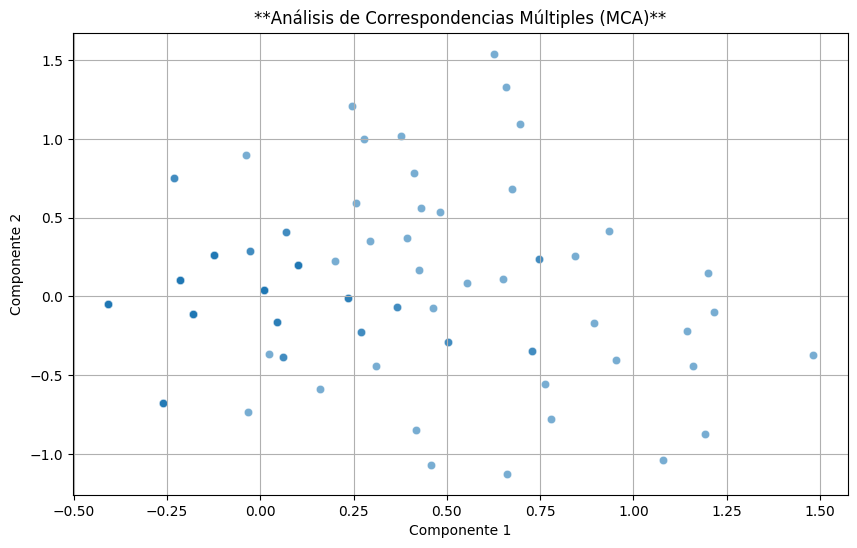

In [105]:

# Lista de columnas con respuestas m√∫ltiples
columnas_multivalor = ['G√©neros musicales favoritos','Cantante o grupo favorito', 'G√®neros literarios favoritos', 
                        'G√©neros cinematogr√°ficos favoritos']

df_mca = df.copy()

for col in columnas_multivalor:
    df_mca[col] = df_mca[col].fillna('')  # Reemplazar NaN con cadena vac√≠a
    opciones_unicas = set()  # Para almacenar todas las categor√≠as √∫nicas
    
    # Extraer todas las respuestas √∫nicas
    df_mca[col].str.split(',').apply(opciones_unicas.update)
    
    # Crear un DataFrame con las nuevas columnas binarias
    df_dummies = df_mca[col].str.get_dummies(sep=',').astype(int)
    
    # Renombrar columnas eliminando espacios adicionales
    df_dummies.columns = df_dummies.columns.str.strip()
    
    # Agregar nuevas columnas a df_mca de una sola vez
    df_mca = pd.concat([df_mca, df_dummies], axis=1)

# Eliminar las columnas originales con valores m√∫ltiples
df_mca.drop(columns=columnas_multivalor, inplace=True)

# Crear una copia del DataFrame para evitar la fragmentaci√≥n
df_mca = df_mca.copy()


import prince  



# Selecci√≥n de variables categ√≥ricas para MCA
columnas_categoricas = ['Vertiente cultural que m√°s consumes', 'Plataforma donde m√°s consumes m√∫sica', 'Plataforma donde mas consumes cine', 'Pel√≠cula favorita', 'Plataforma donde m√°s consumes literatura', 'Arte pl√°stica favorita', 'Plataforma donde m√°s consumes artes pl√°sticas']

# Convertir en variables dummy (one-hot encoding) para variables categ√≥ricas simples
df_mca[columnas_categoricas] = df_mca[columnas_categoricas].astype(str)
df_mca = pd.get_dummies(df_mca, columns=columnas_categoricas, drop_first=True)

# Definir el umbral m√≠nimo de presencia (5% del total de respuestas)
threshold = len(df_mca) * 0.05  

df_mca = df_mca.select_dtypes(include=['number'])  # Mantener solo columnas num√©ricas

# Filtrar columnas con menos del 5% de ocurrencias
low_count_cols = df_mca.columns[df_mca.sum(axis=0) < threshold].tolist()


print(f"üîé Eliminando {len(low_count_cols)} columnas con baja frecuencia.")
df_mca = df_mca.drop(columns=low_count_cols)

df_mca = df_mca.loc[:, ~df_mca.columns.duplicated()]

# Eliminar columnas con varianza menor a 0.05
low_variance_cols = df_mca.var()[df_mca.var() < 0.05].index.tolist()
df_mca = df_mca.drop(columns=low_variance_cols)

#Como MCA requiere columnas binarias se elimina la columna de edad
df_mca = df_mca.drop(columns=['Qu√© edad tienes?'], errors='ignore')


# Aplicar MCA
mca = prince.MCA(n_components=2)
mca.fit(df_mca) 

mca_result = mca.fit_transform(df_mca)

# Convertir resultados a DataFrame
df_mca_result = pd.DataFrame(mca_result.to_numpy(), columns=['Componente 1', 'Componente 2'])

print("üîé Dimensiones de df_mca:", df_mca.shape)
print("üîé Cantidad de valores no nulos por columna:")
print(df_mca.notnull().sum())
print("üîé Cantidad de ceros por columna:")
print((df_mca == 0).sum())
print("üîé Varianza de cada columna en df_mca:")
print(df_mca.var())
print("üîé Matriz transformada de MCA:")
print(mca_result.head())

print("üîé Matriz transformada de MCA:")
print(df_mca_result.describe())  # Ver estad√≠sticas generales


# **Visualizaci√≥n de Resultados**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_mca_result['Componente 1'], y=df_mca_result['Componente 2'], alpha=0.6)
plt.title("**An√°lisis de Correspondencias M√∫ltiples (MCA)**")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()


En el gr√°fico de las primeras componentes no se ven grupos visibles por lo que no podemos asumir que existan relaciones ocultas, a pesar de los tratamientos que se le tuvieron que aplicar al MCA se ve que las preferencias Acci√≥n, Drama y hip-hop aportan mayor varianza, adem√°s la desviaci√≥n est√°ndar (std) de los componentes es relativamente balanceada (~0.4) y los valores m√≠nimos y m√°ximos est√°n equilibrados, lo que significa que las categor√≠as est√°n bien representadas y no hay valores extremos anormales lo cual aporta cierta estabilidad a MCA.

## 11. PCA 

In [99]:
from sklearn.preprocessing import StandardScaler

# Selecci√≥n de todas las columnas excepto identificadores irrelevantes
variables_relevantes = ['Qu√© edad tienes?', 'Vertiente cultural que m√°s consumes', 'G√©neros musicales favoritos', 'Cantante o grupo favorito', 'Plataforma donde m√°s consumes m√∫sica', 'G√©neros cinematogr√°ficos favoritos', 'Plataforma donde mas consumes cine', 'Pel√≠cula favorita', 'G√®neros literarios favoritos', 'Plataforma donde m√°s consumes literatura', 'Escritor favorito', 'Arte pl√°stica favorita', 'Plataforma donde m√°s consumes artes pl√°sticas']


df_pca = df[variables_relevantes]

# Codificar variables categ√≥ricas usando one-hot encoding
df_pca = pd.get_dummies(df_pca, drop_first=True)

# Convertir todas las columnas a float
df_pca = df_pca.astype(float)

# Manejar valores faltantes (rellenar con 0 en este caso)
df_pca = df_pca.fillna(0)

# Normalizaci√≥n de todas las columnas
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA
pca = PCA()  
pca_result = pca.fit_transform(df_pca_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", varianza_explicada)
print("Varianza explicada acumulada:", varianza_explicada.cumsum())



Varianza explicada por cada componente: [0.01127614 0.01101035 0.01073263 0.01055454 0.01030818 0.01016002
 0.0100804  0.00992891 0.00988628 0.00974869 0.00947289 0.00937804
 0.0093009  0.00921678 0.00909635]
Varianza explicada acumulada: [0.01127614 0.02228649 0.03301912 0.04357366 0.05388184 0.06404185
 0.07412225 0.08405116 0.09393744 0.10368613 0.11315901 0.12253705
 0.13183794 0.14105473 0.15015108]


## 11.1 Graficado PCA.

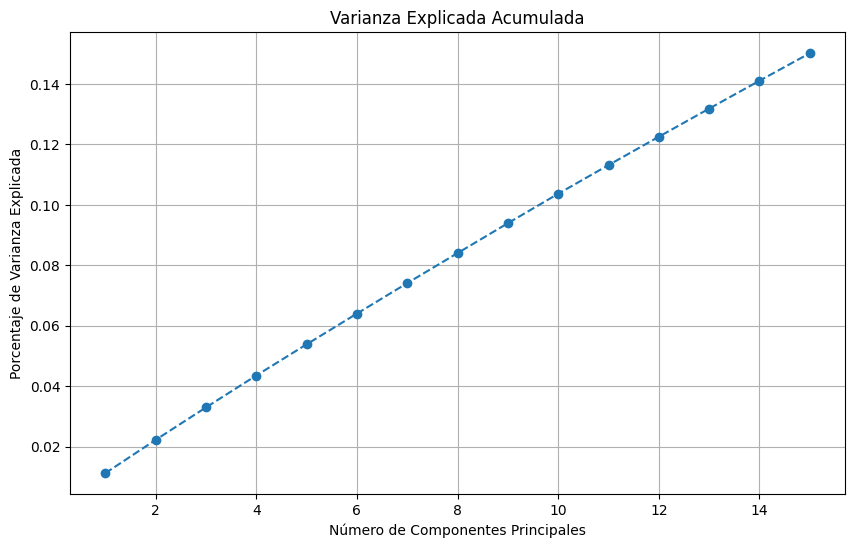

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.grid()
plt.show()


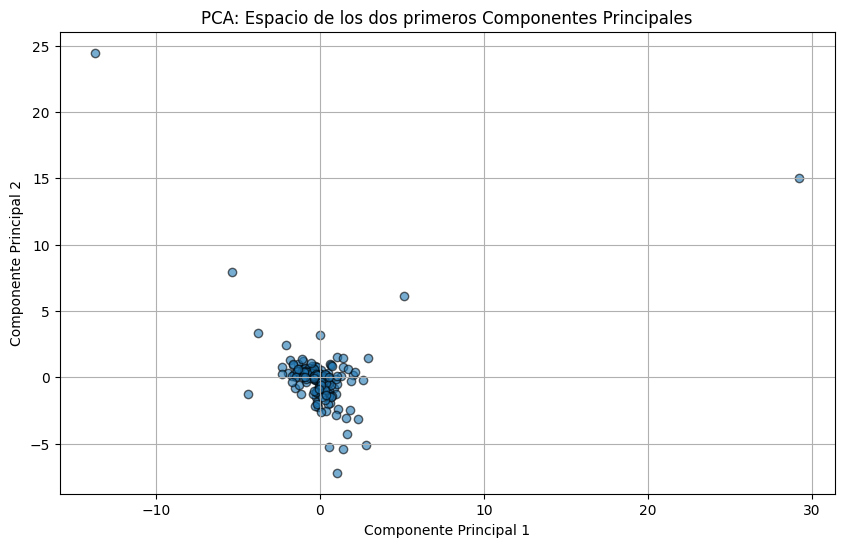

In [101]:
# Crear un DataFrame con los dos primeros componentes principales
df_pca_result = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])

# Graficar los puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], alpha=0.6, edgecolor='k')
plt.title('PCA: Espacio de los dos primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()


### Reduciendo Dimensi√≥n y Buscando variables m√°s relevantes para cada componente

In [102]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
# Reducir el PCA al n√∫mero deseado de componentes (por ejemplo, 10 componentes)
n_componentes_deseados = np.argmax(varianza_acumulada >= 0.70) + 1  
print(f"Seleccionando {n_componentes_deseados} componentes para retener el 70% de la varianza.")

pca_reducido = PCA(n_components=n_componentes_deseados)
pca_result_reducido = pca_reducido.fit_transform(df_pca_scaled)

# Mostrar varianza explicada por los componentes seleccionados
print("Varianza explicada acumulada con los componentes seleccionados:")
print(np.cumsum(pca_reducido.explained_variance_ratio_))


# Crear un DataFrame con las cargas de los componentes principales
cargas_pca = pd.DataFrame(
    pca_reducido.components_,
    columns=df_pca.columns,
    index=[f'PC{i+1}' for i in range(pca_reducido.n_components_)]
)

# Mostrar las variables m√°s influyentes en cada componente
for componente in cargas_pca.index:
    print(f"\nVariables m√°s influyentes en {componente}:")
    print(cargas_pca.loc[componente].abs().sort_values(ascending=False).head(10))


Seleccionando 1 componentes para retener el 70% de la varianza.
Varianza explicada acumulada con los componentes seleccionados:
[0.01122753]

Variables m√°s influyentes en PC1:
Pel√≠cula favorita_king richard                                                    0.267510
Escritor favorito_robert greene                                                   0.267510
Plataforma donde mas consumes cine_Bancos de pel√≠culas                            0.267510
Plataforma donde m√°s consumes literatura_Los descargo de Internet                 0.267510
G√©neros cinematogr√°ficos favoritos_Basados en Hechos Reales                       0.267510
G√©neros musicales favoritos_hip-hop, pop, jazz, blues                             0.267510
Cantante o grupo favorito_ed sheeran , imagine dragons                            0.267510
Cantante o grupo favorito_ricardo arjona, bon jovi                                0.171314
G√©neros cinematogr√°ficos favoritos_Acci√≥n, Comedia, Musical, Ciencia - Ficci√≥n    0.1

### Gr√°ficaci√≥n de las dos primeras componentes

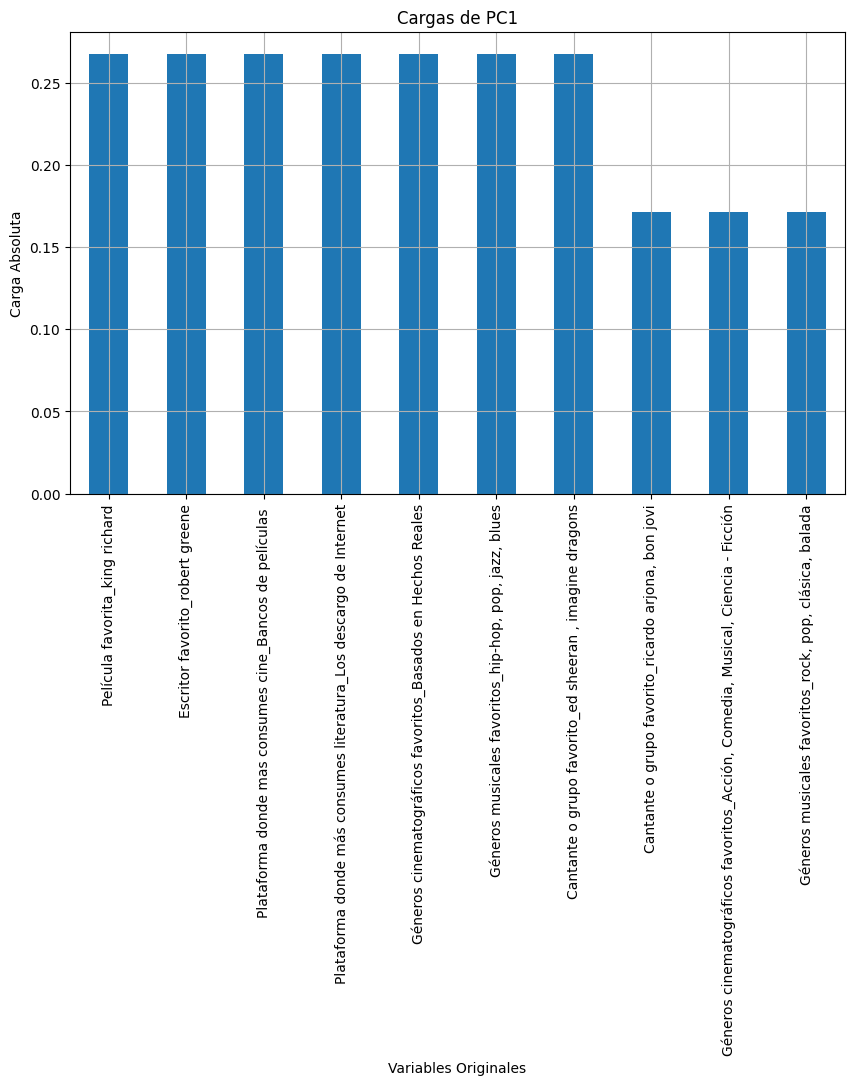

In [103]:
import matplotlib.pyplot as plt

# Seleccionar los 2 componentes a graficar
componentes_a_graficar = ['PC1', 'PC2']  # Puedes cambiar estos nombres seg√∫n corresponda

# Asegurar que los componentes existen en el DataFrame
componentes_existentes = [comp for comp in componentes_a_graficar if comp in cargas_pca.index]

# Graficar solo los componentes seleccionados
n_top = 10  # N√∫mero de variables m√°s influyentes a visualizar
for componente in componentes_existentes:
    plt.figure(figsize=(10, 6))
    cargas_pca.loc[componente].abs().sort_values(ascending=False).head(n_top).plot(kind='bar')
    plt.title(f'Cargas de {componente}')
    plt.ylabel('Carga Absoluta')
    plt.xlabel('Variables Originales')
    plt.grid()
    plt.show()

